# Машинное обучение, ФКН ВШЭ

## Практическое задание 2. Exploratory Data Analysis и линейная регрессия

### Общая информация
Дата выдачи: 05.10.2023

Мягкий дедлайн: 23:59MSK 18.10.2023

Жесткий дедлайн: 23:59MSK 22.10.2022

### О задании
В этом задании мы попытаемся научиться анализировать данные и выделять из них полезные признаки. Мы также научимся пользоваться `seaborn` и `sklearn`, а заодно привыкнем к основным понятиям машинного обучения.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов. Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

**Обратите внимание**, что в каждом разделе домашнего задания есть оцениваниемые задачи и есть вопросы. Вопросы дополняют задачи и направлены на то, чтобы проинтерпретировать или обосновать происходящее. Код без интерпретации не имеет смысла, поэтому отвечать на вопросы обязательно — за отсутствие ответов мы будем снижать баллы за задачи. Если вы ответите на вопросы, но не напишете корректный код к соответствующим оцениваемым задачам, то баллы за такое выставлены не будут.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-02-linregr-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: 11.

В этом ноутбуке используется библиотека `folium` для визуализации карт. Она работает в google colab!

!pip install folium

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))

In [2]:
import folium

m = folium.Map(location=(55.7522200, 37.6155600), zoom_start=10)

m

Если вы всё сделали правильно, то выше должна открыться карта Москвы.

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style="darkgrid")

np.random.seed(0)

## Часть 0. Подготовка (1 балл)

**Задание 1 (1 балл)**. Мы будем работать с данными из соревнования [New York City Taxi Trip Duration](https://www.kaggle.com/c/nyc-taxi-trip-duration/overview), в котором нужно было предсказать длительность поездки на такси. Скачайте обучающую выборку из этого соревнования и загрузите ее:

In [4]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df = pd.read_csv('train.csv')
df.head()

id  vendor_id      pickup_datetime     dropoff_datetime  \
0  id2875421          2  2016-03-14 17:24:55  2016-03-14 17:32:30   
1  id2377394          1  2016-06-12 00:43:35  2016-06-12 00:54:38   
2  id3858529          2  2016-01-19 11:35:24  2016-01-19 12:10:48   
3  id3504673          2  2016-04-06 19:32:31  2016-04-06 19:39:40   
4  id2181028          2  2016-03-26 13:30:55  2016-03-26 13:38:10   

   passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
0                1        -73.982155        40.767937         -73.964630   
1                1        -73.980415        40.738564         -73.999481   
2                1        -73.979027        40.763939         -74.005333   
3                1        -74.010040        40.719971         -74.012268   
4                1        -73.973053        40.793209         -73.972923   

   dropoff_latitude store_and_fwd_flag  trip_duration  
0         40.765602                  N            455  
1         40.731152                  N            663  
2         40.710087                  N           2124  
3         40.706718                  N            429  
4         40.782520                  N            435

In [5]:
df.shape

(1458644, 11)

In [6]:
df.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


Обратите внимание на колонки `pickup_datetime` и `dropoff_datetime`. `dropoff_datetime` был добавлена организаторами только в обучающую выборку, то есть использовать эту колонку нельзя, давайте удалим ее. В `pickup_datetime` записаны дата и время начала поездки. Чтобы с ней было удобно работать, давайте преобразуем даты в `datetime`-объекты

In [8]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
# пока удалять не буду, тк возможно понадобится 
# код честно украл из сема
df['pickup_datetime'] = pd.to_datetime(df.pickup_datetime)
df.loc[:, 'pickup_date'] = df['pickup_datetime'].dt.date
df['dropoff_datetime'] = pd.to_datetime(df.dropoff_datetime)
df['store_and_fwd_flag'] = 1 * (df.store_and_fwd_flag.values == 'Y') # перевел в бинарное 

В колонке `trip_duration` записано целевое значение, которое мы хотим предсказывать. Давайте посмотрим на распределение таргета в обучающей выборке. Для этого нарисуйте его гистограмму:

<Axes: xlabel='trip_duration', ylabel='Count'>

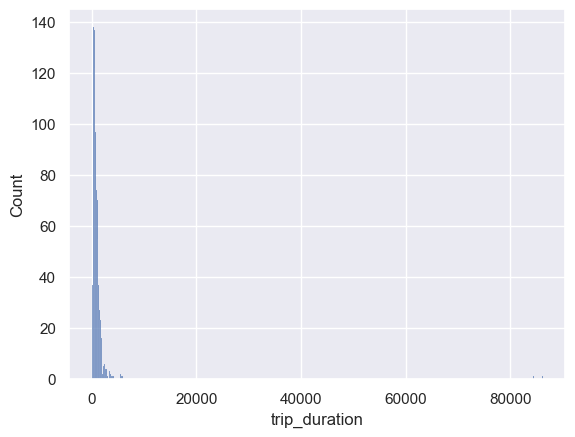

In [9]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
sns.histplot(data=df.sample(1000), x='trip_duration')

**Вопрос**: Что можно сказать о целевой переменной по гистограмме её значений?

----
ANS:
есть выбросы, лучше наверное смотреть все в лог маштабе и без выбросов


---

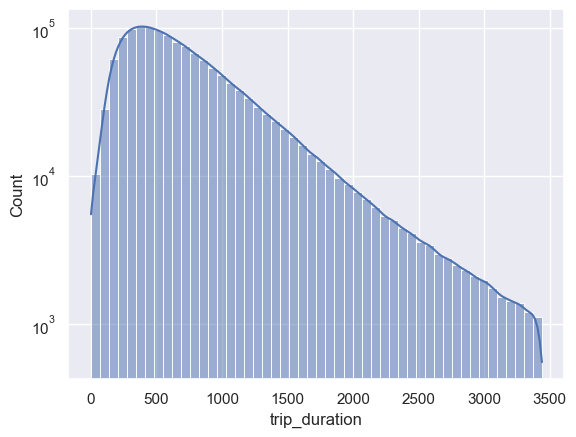

In [10]:
# отброшу выбросы и прологарифмирую, чтобы график получился красивым
q = df['trip_duration'].quantile(0.99)

sns.histplot(data=df[df['trip_duration'] <= q], x='trip_duration', bins=50, kde=True)
plt.yscale('log')

ANS:
Видим, что в основном поездки коротко-средние

В соревновании в качестве метрики качества использовалось RMSLE:
$$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2}$$

**Вопрос**: Как вы думаете, почему авторы соревнования выбрали именно RMSLE, а не RMSE?

----

ANS:
Тк распределение целевой переменной лучше в лог шкале (лучше == более понятно, что там происходит и + есть эксп убывание, а в логарифме это линейное)

ну и корень берут, чтобы работать с еденицами, а не квадратами едениц 

----

На семинаре мы рассматривали несколько моделей линейной регрессии в `sklearn`, но каждая из них оптимизировала среднеквадратичную ошибку (MSE), а не RMSLE. Давайте проделаем следующий трюк: будем предсказывать не целевую переменную, а ее *логарифм*. Обозначим $\hat{y}_i = \log{(y_i + 1)}$ — модифицированный таргет, а $\hat{a}(x_i)$ — предсказание модели, которая обучалась на $\hat{y}_i$, то есть логарифм таргета. Чтобы предсказать исходное значение, мы можем просто взять экспоненту от нашего предсказания: $a(x_i) = \exp(\hat{a}(x_i)) - 1$.

**Вопрос**: Покажите, что оптимизация RMSLE для модели $a$ эквивалентна оптимизации MSE для модели $\hat{a}$.

**Доказательство**: ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Не важно, что минимизировать, квадрат велечины или просто ее, тк минимум будет в одних и тех же значениях, тоже самое можно и сказать про логарифм

Более формально:

$\text{RMSLE}(X, y, a) = \sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\log{(y_i + 1)} - \log{(a(x_i) + 1)}\big)^2} = 
\sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\hat{y}_i - \log{(\exp(\hat{a}(x_i)) - 1 + 1)}\big)^2} =
\sqrt{\frac{1}{\ell}\sum_{i=1}^{\ell} \big(\hat{y}_i - \hat{a}(x_i)\big)^2} = RMSE$

Итак, мы смогли свести задачу оптимизации RMSLE к задаче оптимизации MSE, которую мы умеем решать! Кроме того, у логарифмирования таргета есть еще одно полезное свойство. Чтобы его увидеть, добавьте к нашей выборке колонку `log_trip_duration` (воспользуйтесь `np.log1p`) и нарисуйте гистограмму модифицированного таргета по обучающей выборке. Удалите колонку со старым таргетом.

<Axes: xlabel='log_trip_duration', ylabel='Count'>

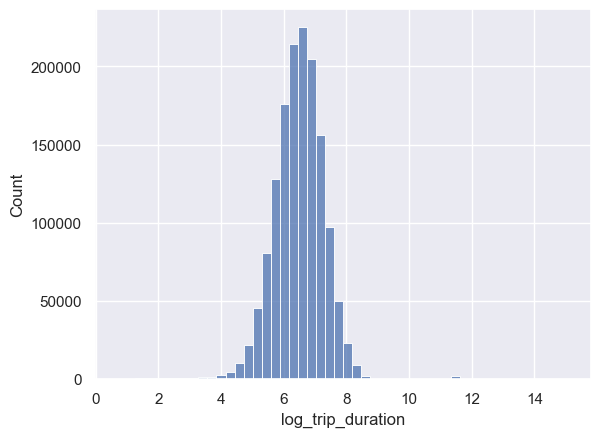

In [11]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df['log_trip_duration'] = np.log1p(df['trip_duration'])
# df.drop(columns=['trip_duration'], inplace=True)
sns.histplot(data=df, x='log_trip_duration', bins=50)

Чтобы иметь некоторую точку отсчета, давайте посчитаем значение метрики при наилучшем константном предсказании:

In [12]:
def rmsle(log1p_y_true, log1p_y_pred): 
    #╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
    return np.sqrt(np.mean((log1p_y_true - log1p_y_pred)**2))

rmsle_best_const = rmsle(df['log_trip_duration'], df['log_trip_duration'].mean())
print(rmsle_best_const)
assert np.allclose(rmsle_best_const, 0.79575, 1e-4)

0.7957592365411509


## Часть 1. Изучаем `pickup_datetime` (2 балла)

**Задание 2 (0.25 баллов)**. Для начала давайте посмотрим, сколько всего было поездок в каждый из дней. Постройте график зависимости количества поездок от дня в году (например, можно воспользоваться `sns.countplot`):

Text(0, 0.5, 'Count')

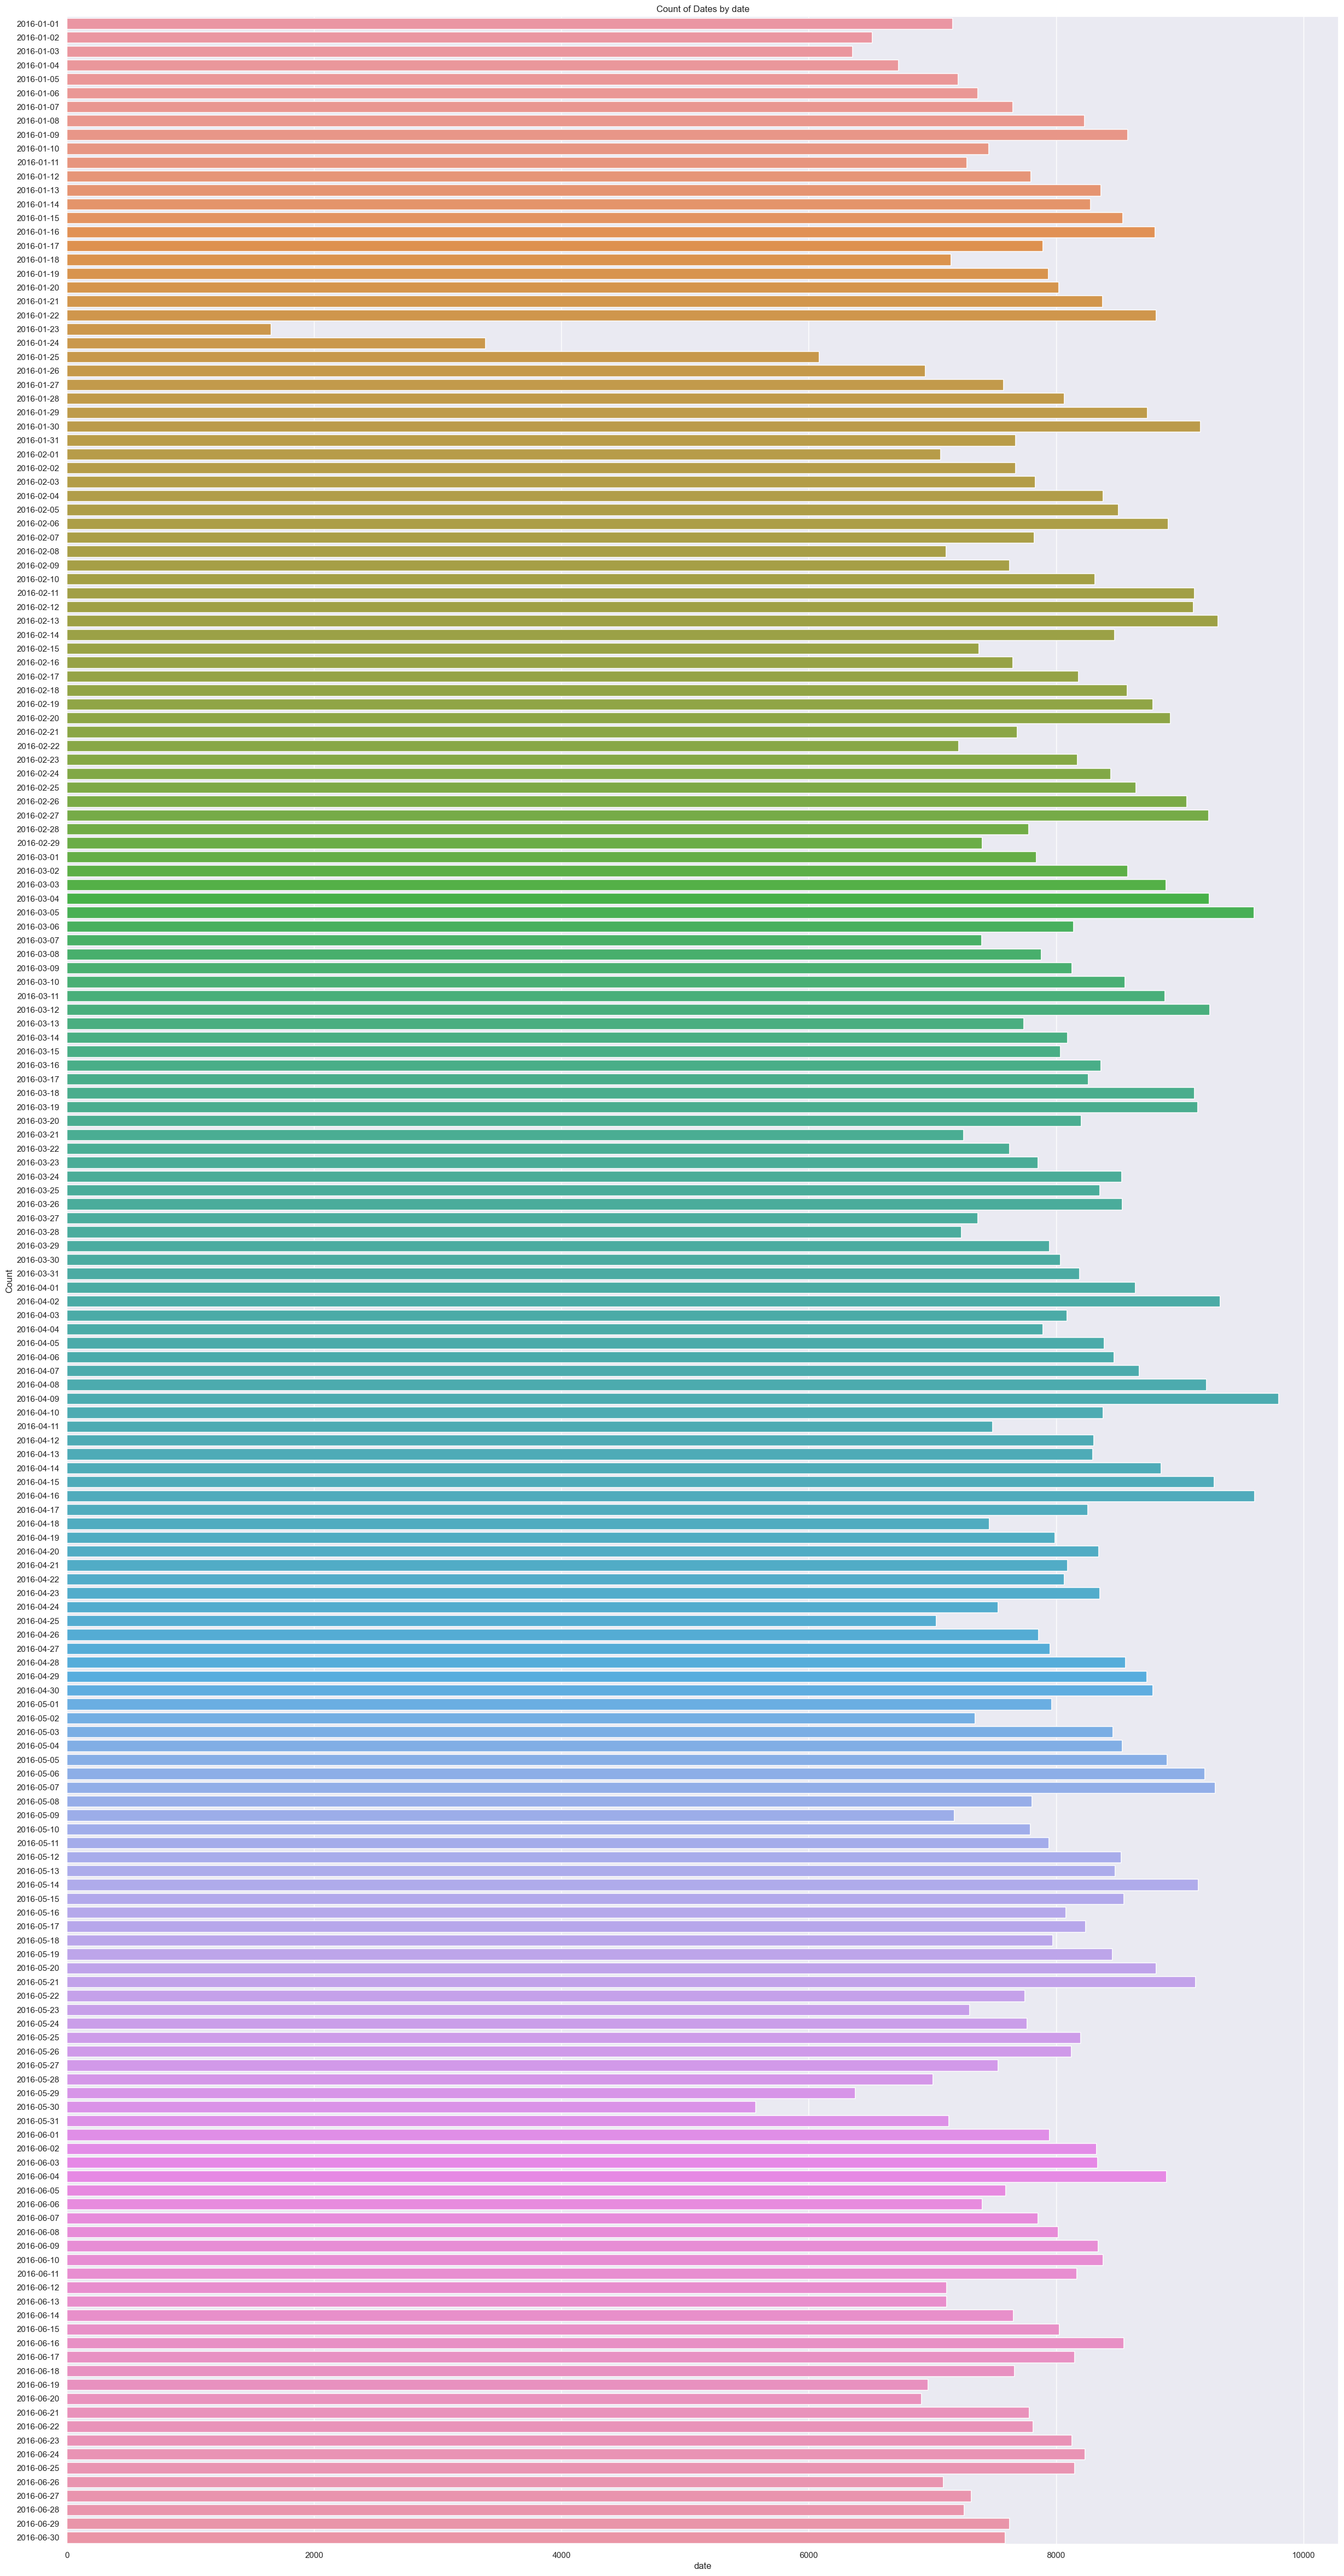

In [13]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・
df['pickup_date'] = df['pickup_datetime'].dt.date
plt.figure(figsize=(30, 60))
sns.countplot(data=df.sort_values(by='pickup_date'), y='pickup_date')
plt.title('Count of Dates by date')
plt.xlabel('date')
plt.ylabel('Count')

**Вопрос**: Вы, вероятно, заметили, что на графике есть 2 периода с аномально маленькими количествами поездок. Вычислите, в какие даты происходили эти скачки вниз и найдите информацию о том, что происходило в эти дни в Нью-Йорке.

----

ANS:

1.A travel ban was instituted for New York City and Newark, New Jersey, for January 23–24. The storm was given various unofficial names, including Winter Storm Jonas, Blizzard of 2016, and Snowzilla.


2.Memorial Day (originally known as Decoration Day) is a federal holiday in the United States for honoring and mourning the U.S. military personnel who died while serving in the United States Armed Forces. From 1868 to 1970, it was observed on May 30.

----


Нарисуйте графики зависимости количества поездок от дня недели и от часов в сутках (воспользуйтесь `sns.relplot`):

In [14]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
value_counts = df['pickup_date'].value_counts()
min_count_categories = value_counts.nsmallest(3).index
print(min_count_categories)

Index([2016-01-23, 2016-01-24, 2016-05-30], dtype='object')


In [15]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df['hour'] = df['pickup_datetime'].dt.hour
df['month'] = df['pickup_datetime'].dt.month_name()
df['day'] = df['pickup_datetime'].dt.weekday
df['day_year'] = df['pickup_datetime'].dt.dayofyear

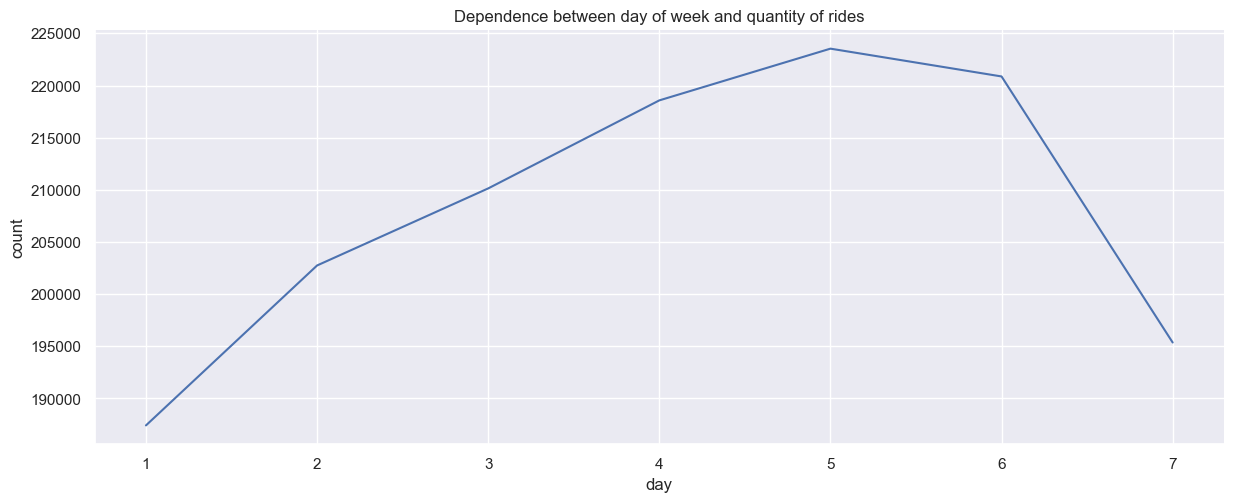

In [16]:
df_grouped = df.groupby(['day']).size().reset_index(name='count') + 1

sns.relplot(x='day', y='count', kind='line', data=df_grouped,height=5, aspect=2.5, linewidth=1.5)
plt.title("Dependence between day of week and quantity of rides")
plt.show()

**Задание 3 (0.5 баллов)**. Нарисуйте на одном графике зависимости количества поездок от часа в сутках для разных месяцев (разные кривые, соответствующие разным месяцам, окрашивайте в разные цвета, воспользуйтесь `hue` в `sns.relplot`). Аналогично нарисуйте зависимости количества поездок от часа в сутках для разных дней недели.

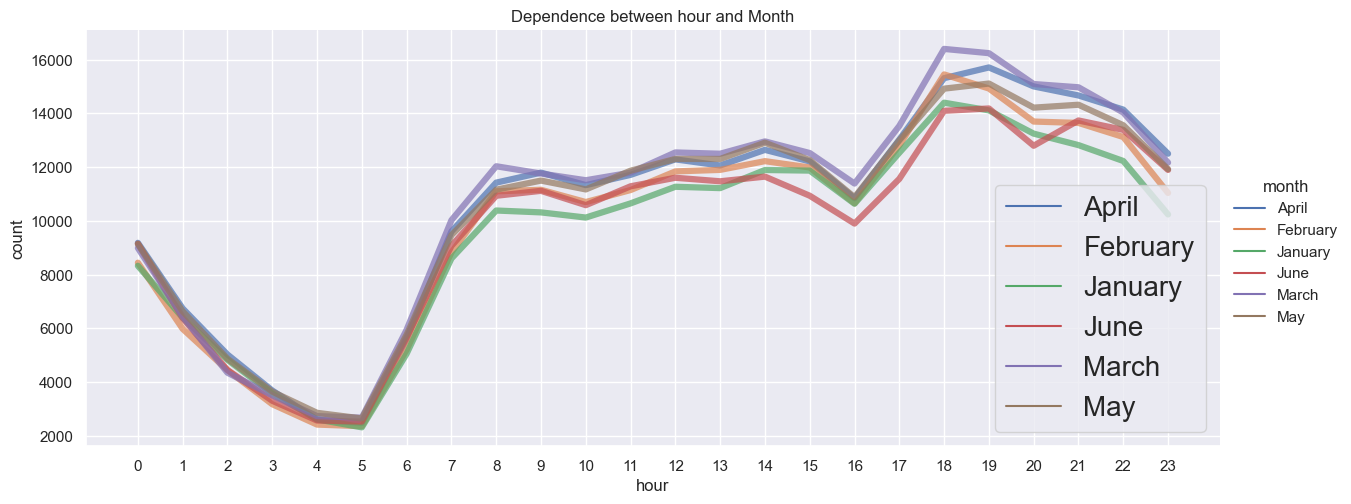

In [17]:
df_grouped = df.groupby(['hour', 'month']).size().reset_index(name='count')

# palette = sns.color_palette("deep", n_colors=df_grouped['month'].nunique())

ax = sns.relplot(x='hour', y='count', kind='line', hue='month', data=df_grouped, height=5, aspect=2.5, linewidth=4.5, alpha=0.7)
ax.set(xticks=range(24))
plt.title("Dependence between hour and Month")
plt.legend(prop={'size': 20})
plt.show()

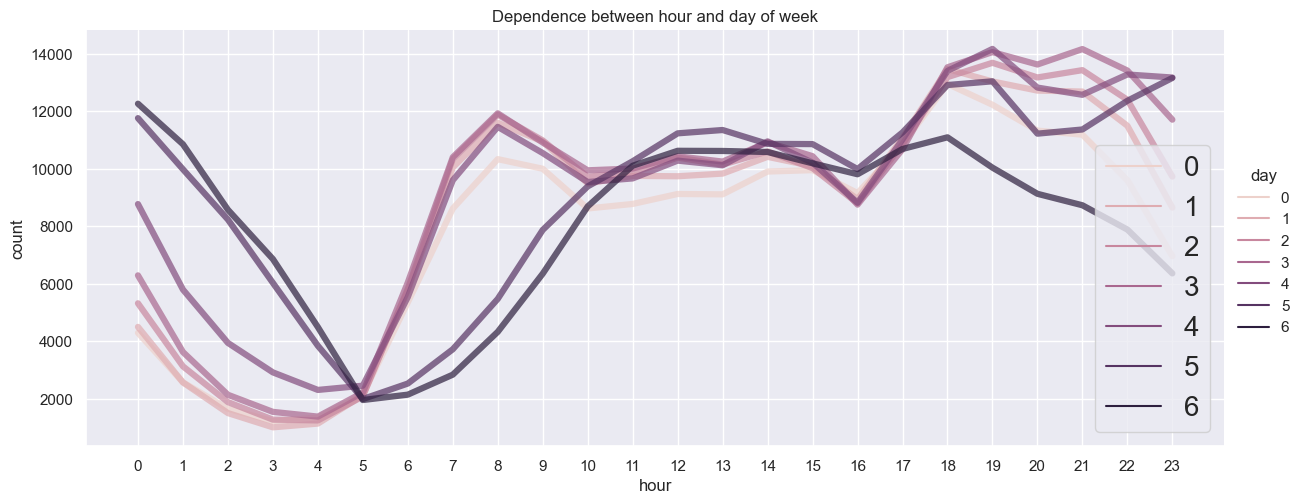

In [18]:
df_grouped = df.groupby(['day', 'hour']).size().reset_index(name='count')

ax = sns.relplot(x='hour', y='count', kind='line', hue='day', data=df_grouped, height=5, aspect=2.5, linewidth=4.5, alpha=0.7)
ax.set(xticks=range(24))
plt.title("Dependence between hour and day of week")
plt.legend(prop={'size': 20})
plt.show()

**Вопрос**: Какие выводы можно сделать, основываясь на графиках выше? Выделяются ли какие-нибудь дни недели? Месяца? Время суток? С чем это связано?

----
ANS:
Месяцы особо не выделяются между друг другом, ну может чуть чаще люди стали ездить весной , относительно зимы

Возможно это связано с тем, что весной меньше пробок из-за плохой погоды

Среди времени заметно, что днем поездок больше чем ночь (ночью надо спать, а не на такси кататься)

Виднo, что по будням люди ездят на работу и вечером возвращаются (два час-пика), на выходных такого нет 

в четверг, пятницу, субботу - вечером, поездок больше чем в другое время по этим дням, возможно это связано с тем что, люди в эти дни ходят на какие-то мероприятия и собираются с друзьями в барах

---



**Задание 4 (0.5 баллов)**. Разбейте выборку на обучающую и тестовую в отношении 7:3 (используйте `train_test_split` из `sklearn`). По обучающей выборке нарисуйте график зависимости среднего логарифма времени поездки от дня недели. Затем сделайте то же самое, но для часа в сутках и дня в году.

In [19]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
# на кэгле же естб уже тестовая выборка?
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.3, random_state=42)

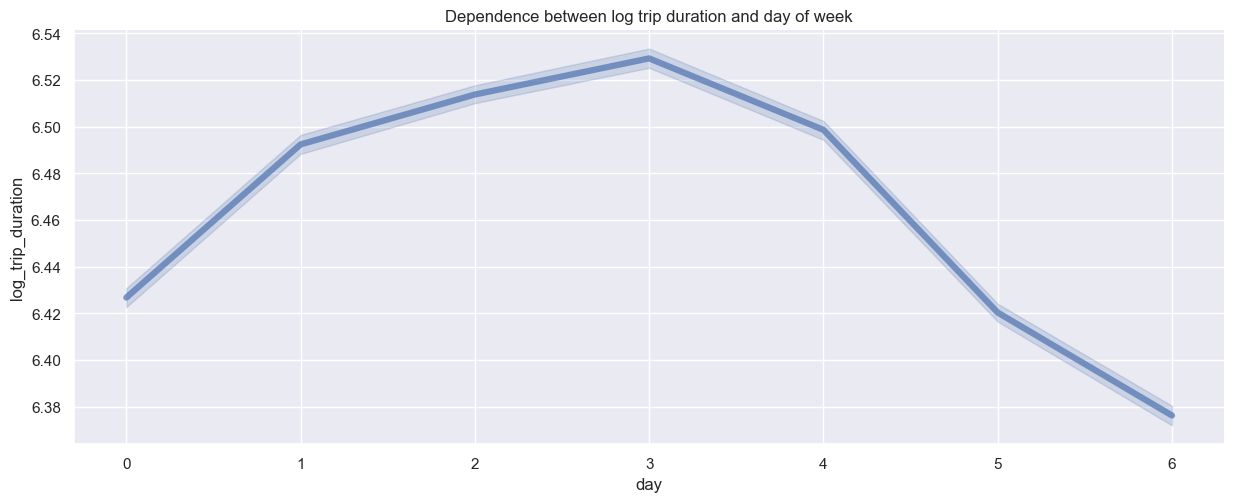

In [20]:
sns.relplot(data=df_train, x='day', y='log_trip_duration', kind='line', height=5, aspect=2.5, linewidth=4.5, alpha=0.7)
plt.title("Dependence between log trip duration and day of week")
plt.show()

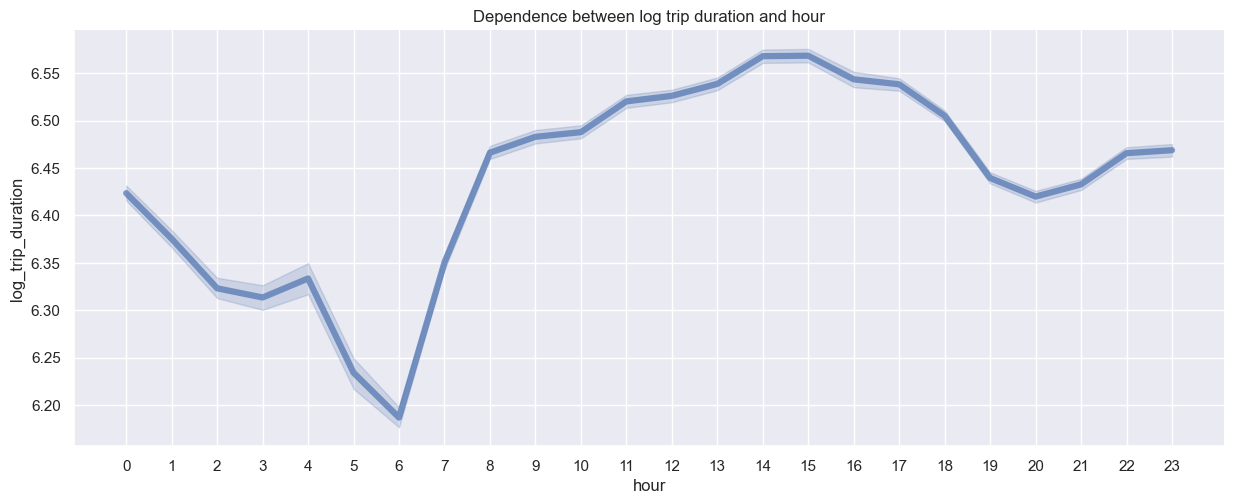

In [21]:
ax = sns.relplot(data=df_train, x='hour', y='log_trip_duration', kind='line', height=5, aspect=2.5, linewidth=4.5, alpha=0.7)
ax.set(xticks=range(24))
plt.title("Dependence between log trip duration and hour")
plt.show()

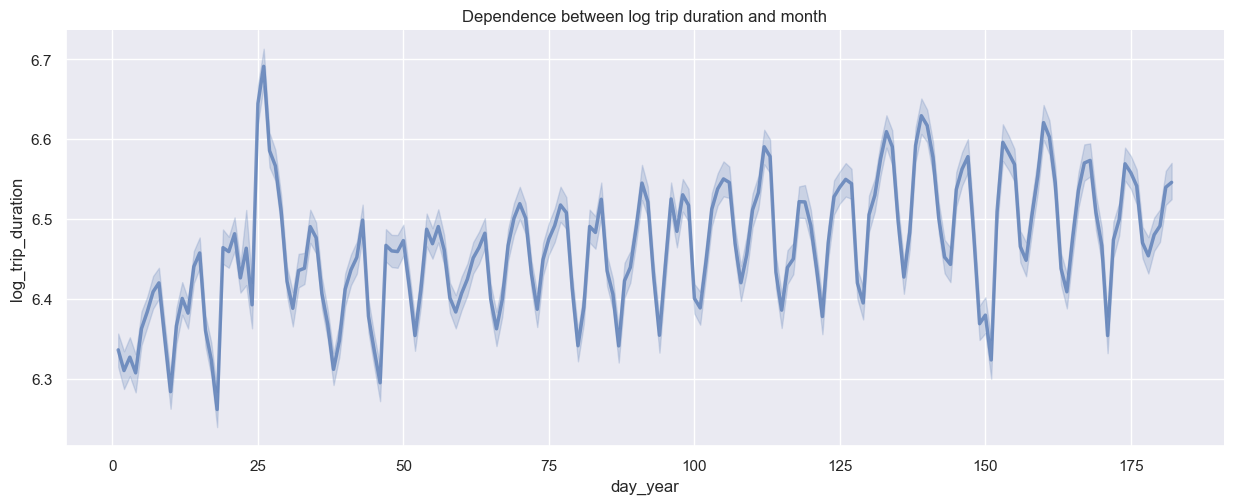

In [22]:
sns.relplot(data=df_train, x='day_year', y='log_trip_duration', kind='line', height=5, aspect=2.5, linewidth=2.5, alpha=0.7)
plt.title("Dependence between log trip duration and month")
plt.show()

**Вопрос**: Похожи ли графики зависимости таргета от дня недели и от часа в сутках на аналогичные графики для количества поездок? Почему? Что происходит со средним таргетом в те два аномальных периода, что мы видели выше? Почему так происходит? Наблюдаете ли вы какой-нибудь тренд на графике зависимости `log_trip_duration` от номера дня в году?


----
ANS:
Да, графики очень похожи между собой, получается, что время поездки и их количество связаны, больше поездок => больше пробок => дольше время поездки (и наоборот также)



В один из аномальных дней (когда был ураган),  среднее время поездки заметно выросло(плохая погода => пробки)

А в другой заметна просадка (видимо из-за маленького количества и небыло долгих поездок, тк чаще всего совершаются именно короткие)

А ну или там еще могли перекрывать улицы в честь праздника 


Есть рост в течении года в графике зависимости `log_trip_duration` от номера дня в году

-----

Добавьте следующие признаки на основе `pickup_datetime`:
1. День недели
2. Месяц
3. Час
4. Является ли период аномальным (два бинарных признака, соответствующие двум аномальным периодам)
5. Номер дня в году

In [23]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
# все пункты, кроме 4 делал выше
print(min_count_categories) # вычислял выше
def apply_outlier(data):
    data['outlier'] = 0
    data.loc[df['pickup_date'].isin(min_count_categories), 'outlier'] = 1

for data in [df_train, df_test]:
    apply_outlier(data)
    
df_train.head()

Index([2016-01-23, 2016-01-24, 2016-05-30], dtype='object')


id  vendor_id     pickup_datetime    dropoff_datetime  \
1011257  id2209155          2 2016-05-03 09:03:08 2016-05-03 09:17:12   
178550   id0586605          1 2016-01-01 16:40:51 2016-01-01 16:57:32   
551460   id0467144          1 2016-04-24 13:57:03 2016-04-24 14:14:31   
1434271  id0989010          2 2016-01-10 17:03:47 2016-01-10 17:16:51   
1173610  id0580742          1 2016-02-25 17:37:36 2016-02-25 17:49:48   

         passenger_count  pickup_longitude  pickup_latitude  \
1011257                2        -73.979813        40.752529   
178550                 1        -73.977623        40.746296   
551460                 1        -73.950699        40.779404   
1434271                1        -73.984558        40.721802   
1173610                1        -73.967720        40.768742   

         dropoff_longitude  dropoff_latitude  store_and_fwd_flag  \
1011257         -73.982681         40.763680                   0   
178550          -73.968414         40.788933                   0   
551460          -73.863129         40.768608                   0   
1434271         -73.976753         40.752213                   0   
1173610         -73.977173         40.789875                   0   

         trip_duration pickup_date  log_trip_duration  hour     month  day  \
1011257            844  2016-05-03           6.739337     9       May    1   
178550            1001  2016-01-01           6.909753    16   January    4   
551460            1048  2016-04-24           6.955593    13     April    6   
1434271            784  2016-01-10           6.665684    17   January    6   
1173610            732  2016-02-25           6.597146    17  February    3   

         day_year  outlier  
1011257       124        0  
178550          1        0  
551460        115        0  
1434271        10        0  
1173610        56        0

Итак, мы уже создали некоторое количество признаков.

**Вопрос**: Какие из признаков _стоит рассматривать в этой задаче_   как категориальные, а какие - как численные? Почему?


----

ANS:

Они тут все подходят под категориальные (небольшое количество значений) и при этом нет лин зависимости между таргетом и каким-либо признаком

(там где день в году - он с большим шумом, так что тоже -)

----

**Задание 5 (0.75 баллов)**. Обучите `Ridge`-регрессию с параметрами по умолчанию, закодировав все категориальные признаки с помощью `OneHotEncoder`. Численные признаки отмасштабируйте с помощью `StandardScaler`. Используйте только признаки, которые мы выделили в этой части задания.

In [24]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import Ridge

numerical_features = ['passenger_count', 
                      'pickup_longitude', 
                      'pickup_latitude',
                      'dropoff_longitude', 
                      'dropoff_latitude', 
                      'outlier']

categorical_features = ['hour', 
                        'month', 
                        'day', 
                        'day_year']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])


pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

pipeline.fit(df_train[numerical_features + categorical_features], df_train['log_trip_duration'])

pred = pipeline.predict(df_test[numerical_features + categorical_features])

print(f"RMSLE (test) = {rmsle(df_test['log_trip_duration'], pred)}")

RMSLE (test) = 0.7714420622970523


## Часть 2. Изучаем координаты (3 балла)
Мы уже очень хорошо изучили данные о времени начала поездки, давайте теперь посмотрим на информацию о координатах начала и конца поездки. Мы подготовили для вас функцию, которая на карте рисует точки начала или конца поездки. Примеры ее вызова вы найдете ниже. Обратите внимание, что в эту функцию мы передаем лишь небольшой кусочек данных, посколько иначе функция будет работать очень долго

In [25]:
def show_circles_on_map(data, latitude_column, longitude_column, color):
    """
    The function draws map with circles on it.
    The center of the map is the mean of coordinates passed in data.
    
    data: DataFrame that contains columns latitude_column and longitude_column
    latitude_column: string, the name of column for latitude coordinates
    longitude_column: string, the name of column for longitude coordinates
    color: string, the color of circles to be drawn
    """

    location = (data[latitude_column].mean(), data[longitude_column].mean())
    m = folium.Map(location=location)

    for _, row in data.iterrows():
        folium.Circle(
            radius=100,
            location=(row[latitude_column], row[longitude_column]),
            color=color,
            fill_color=color,
            fill=True
        ).add_to(m)

    return m

In [26]:
show_circles_on_map(df.sample(1000), "pickup_latitude", "pickup_longitude", "blue")

In [27]:
show_circles_on_map(df.sample(1000), "dropoff_latitude", "dropoff_longitude", "blue")

**Вопрос**: Какие пункты (или скопления точек, в количестве 2-3), по вашему мнению, выделяются на карте от основной массы и могут быть полезны для нашей задачи? Почему вы их выбрали? В чём особенность этих скоплений точек для нашей задачи?


-----

ANS:

Видны аэропорты, мы однозначно можем интерпретировать эти точки и понять зачем ездят люди, те они дают нам какую-то доп инфу


----

**Задание 6 (0.75 балл)**. Как мы все прекрасно помним, $t = s / v_{\text{ср}}$, поэтому очевидно, что самым сильным признаком будет расстояние, которое необходимо проехать. Мы не можем посчитать точное расстояние, которое необходимо преодолеть такси, но мы можем его оценить, посчитав кратчайшее расстояние между точками начала и конца поездки. Чтобы корректно посчитать расстояние между двумя точками на Земле, можно использовать функцию `haversine`. Также можно воспользоваться кодом с первого семинара. Посчитайте кратчайшее расстояние для объектов и запишите его в колонку `haversine`:

In [28]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
# честно украдено из семинара

def haversine_array(lat1, lng1, lat2, lng2):
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    AVG_EARTH_RADIUS = 6371  # in km
    lat = lat2 - lat1
    lng = lng2 - lng1
    d = np.sin(lat * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng * 0.5) ** 2
    h = 2 * AVG_EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

In [29]:
def apply_hav(data):
    data['hav'] = haversine_array(data['pickup_latitude'].values, 
                                  data['pickup_longitude'].values, 
                                  data['dropoff_latitude'].values, 
                                  data['dropoff_longitude'].values)
    
for data in [df_train, df_test]:
    apply_hav(data)
    
df_train.head()

id  vendor_id     pickup_datetime    dropoff_datetime  \
1011257  id2209155          2 2016-05-03 09:03:08 2016-05-03 09:17:12   
178550   id0586605          1 2016-01-01 16:40:51 2016-01-01 16:57:32   
551460   id0467144          1 2016-04-24 13:57:03 2016-04-24 14:14:31   
1434271  id0989010          2 2016-01-10 17:03:47 2016-01-10 17:16:51   
1173610  id0580742          1 2016-02-25 17:37:36 2016-02-25 17:49:48   

         passenger_count  pickup_longitude  pickup_latitude  \
1011257                2        -73.979813        40.752529   
178550                 1        -73.977623        40.746296   
551460                 1        -73.950699        40.779404   
1434271                1        -73.984558        40.721802   
1173610                1        -73.967720        40.768742   

         dropoff_longitude  dropoff_latitude  store_and_fwd_flag  \
1011257         -73.982681         40.763680                   0   
178550          -73.968414         40.788933                   0   
551460          -73.863129         40.768608                   0   
1434271         -73.976753         40.752213                   0   
1173610         -73.977173         40.789875                   0   

         trip_duration pickup_date  log_trip_duration  hour     month  day  \
1011257            844  2016-05-03           6.739337     9       May    1   
178550            1001  2016-01-01           6.909753    16   January    4   
551460            1048  2016-04-24           6.955593    13     April    6   
1434271            784  2016-01-10           6.665684    17   January    6   
1173610            732  2016-02-25           6.597146    17  February    3   

         day_year  outlier       hav  
1011257       124        0  1.263187  
178550          1        0  4.804012  
551460        115        0  7.471088  
1434271        10        0  3.444869  
1173610        56        0  2.481063

Так как мы предсказываем логарифм времени поездки и хотим, чтобы наши признаки были линейно зависимы с этой целевой переменной, нам нужно логарифмировать расстояние: $\log t = \log s - \log{v_{\text{ср}}}$. Запишите логарифм `haversine` в отдельную колонку `log_haversine`:

In [30]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

def apply_log_to_hav(data):
    data['log_hav'] = np.log1p(data['hav'])
    
for data in [df_train, df_test]:
    apply_log_to_hav(data)
    
df_train.head()

id  vendor_id     pickup_datetime    dropoff_datetime  \
1011257  id2209155          2 2016-05-03 09:03:08 2016-05-03 09:17:12   
178550   id0586605          1 2016-01-01 16:40:51 2016-01-01 16:57:32   
551460   id0467144          1 2016-04-24 13:57:03 2016-04-24 14:14:31   
1434271  id0989010          2 2016-01-10 17:03:47 2016-01-10 17:16:51   
1173610  id0580742          1 2016-02-25 17:37:36 2016-02-25 17:49:48   

         passenger_count  pickup_longitude  pickup_latitude  \
1011257                2        -73.979813        40.752529   
178550                 1        -73.977623        40.746296   
551460                 1        -73.950699        40.779404   
1434271                1        -73.984558        40.721802   
1173610                1        -73.967720        40.768742   

         dropoff_longitude  dropoff_latitude  store_and_fwd_flag  \
1011257         -73.982681         40.763680                   0   
178550          -73.968414         40.788933                   0   
551460          -73.863129         40.768608                   0   
1434271         -73.976753         40.752213                   0   
1173610         -73.977173         40.789875                   0   

         trip_duration pickup_date  log_trip_duration  hour     month  day  \
1011257            844  2016-05-03           6.739337     9       May    1   
178550            1001  2016-01-01           6.909753    16   January    4   
551460            1048  2016-04-24           6.955593    13     April    6   
1434271            784  2016-01-10           6.665684    17   January    6   
1173610            732  2016-02-25           6.597146    17  February    3   

         day_year  outlier       hav   log_hav  
1011257       124        0  1.263187  0.816774  
178550          1        0  4.804012  1.758549  
551460        115        0  7.471088  2.136659  
1434271        10        0  3.444869  1.491750  
1173610        56        0  2.481063  1.247338

Убедимся, что логарифм расстояния лучше коррелирует с нашим таргетом, чем просто расстояние:

In [31]:
your_df = df_train
assert your_df['log_hav'].corr(your_df['log_trip_duration']) > your_df['hav'].corr(your_df['log_trip_duration'])

<Axes: >

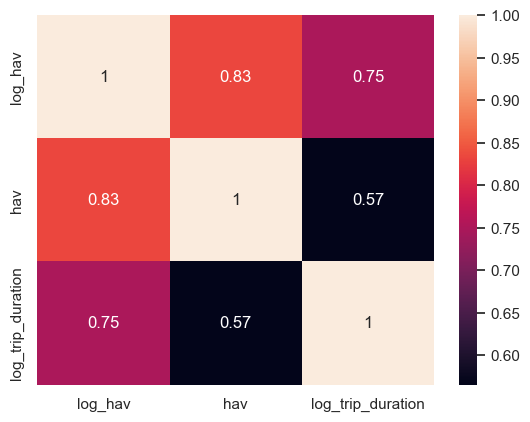

In [32]:
sns.heatmap(df_train[['log_hav', 'hav', 'log_trip_duration']].corr(), annot=True)

**Задание 7 (0.75 балла)**. Давайте изучим среднюю скорость движения такси. Посчитайте среднюю скорость для каждого объекта обучающей выборки, разделив `haversine` на `trip_duration`, и нарисуйте гистограмму ее распределения

In [33]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
def calc_speed(data):
    data['speed'] = data['hav'] / data['trip_duration']
    
for data in [df_train, df_test]:
    calc_speed(data)
df_train.head()

id  vendor_id     pickup_datetime    dropoff_datetime  \
1011257  id2209155          2 2016-05-03 09:03:08 2016-05-03 09:17:12   
178550   id0586605          1 2016-01-01 16:40:51 2016-01-01 16:57:32   
551460   id0467144          1 2016-04-24 13:57:03 2016-04-24 14:14:31   
1434271  id0989010          2 2016-01-10 17:03:47 2016-01-10 17:16:51   
1173610  id0580742          1 2016-02-25 17:37:36 2016-02-25 17:49:48   

         passenger_count  pickup_longitude  pickup_latitude  \
1011257                2        -73.979813        40.752529   
178550                 1        -73.977623        40.746296   
551460                 1        -73.950699        40.779404   
1434271                1        -73.984558        40.721802   
1173610                1        -73.967720        40.768742   

         dropoff_longitude  dropoff_latitude  store_and_fwd_flag  ...  \
1011257         -73.982681         40.763680                   0  ...   
178550          -73.968414         40.788933                   0  ...   
551460          -73.863129         40.768608                   0  ...   
1434271         -73.976753         40.752213                   0  ...   
1173610         -73.977173         40.789875                   0  ...   

         pickup_date log_trip_duration  hour     month day  day_year  outlier  \
1011257   2016-05-03          6.739337     9       May   1       124        0   
178550    2016-01-01          6.909753    16   January   4         1        0   
551460    2016-04-24          6.955593    13     April   6       115        0   
1434271   2016-01-10          6.665684    17   January   6        10        0   
1173610   2016-02-25          6.597146    17  February   3        56        0   

              hav   log_hav     speed  
1011257  1.263187  0.816774  0.001497  
178550   4.804012  1.758549  0.004799  
551460   7.471088  2.136659  0.007129  
1434271  3.444869  1.491750  0.004394  
1173610  2.481063  1.247338  0.003389  

[5 rows x 21 columns]

<Axes: xlabel='speed', ylabel='Count'>

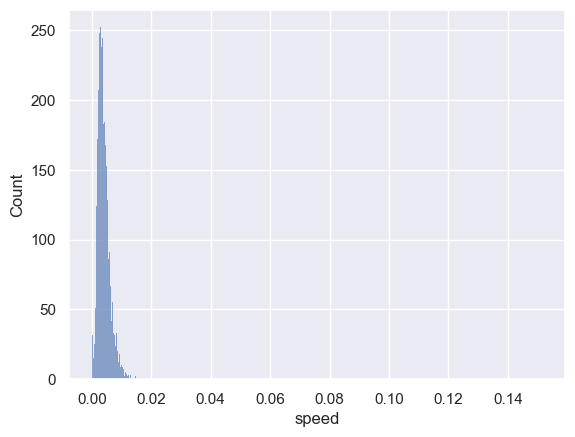

In [34]:
sns.histplot(df_train['speed'].sample(3000))

Как можно видеть по гистограмме, для некоторых объектов у нас получились очень больше значения скоростей. Нарисуйте гистограмму по объектам, для которых значение скорости получилось разумным (например, можно не включать рассмотрение объекты, где скорость больше некоторой квантили):

<Axes: xlabel='speed', ylabel='Count'>

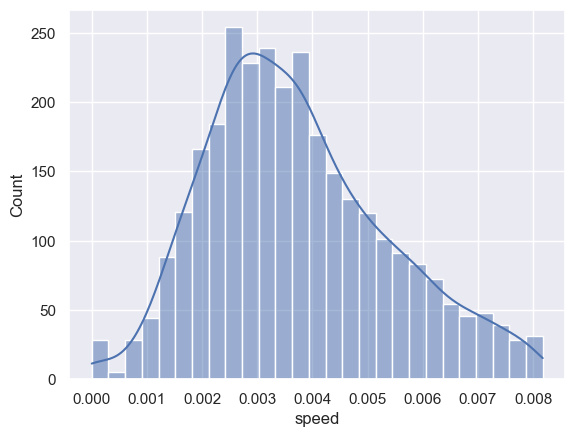

In [35]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
q = df_train['speed'].quantile(0.95)

sns.histplot(data=df_train[df_train['speed'] <= q].sample(3000), x='speed', kde=True)

Для каждой пары (день недели, час суток) посчитайте медиану скоростей. Нарисуйте с помощью `sns.heatmap` график, где по осям будут дни недели и часы, а в качестве значения функции - медиана скорости

<Axes: xlabel='hour', ylabel='day'>

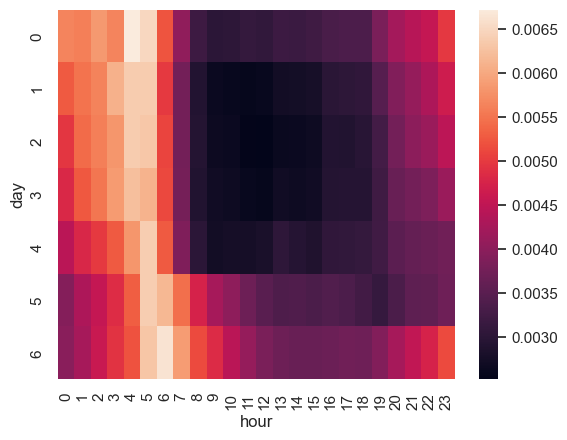

In [36]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
groupped = df_train.groupby(['day', 'hour'])['speed'].agg('median').reset_index()
sns.heatmap(groupped.pivot(index='day', columns='hour', values='speed'))

Не забудьте удалить колонку со значением скорости из данных!

**Вопрос**: Почему значение скорости нельзя использовать во время обучения?

-----
ANS: 

Мы хотим предсказывать время, а скорость считали как раз через время 


----

In [37]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:
def drop_speed(data):
    data.drop(columns=['speed'], inplace=True)
    
for data in [df_train, df_test]:
    drop_speed(data)
    
df_train.head()

id  vendor_id     pickup_datetime    dropoff_datetime  \
1011257  id2209155          2 2016-05-03 09:03:08 2016-05-03 09:17:12   
178550   id0586605          1 2016-01-01 16:40:51 2016-01-01 16:57:32   
551460   id0467144          1 2016-04-24 13:57:03 2016-04-24 14:14:31   
1434271  id0989010          2 2016-01-10 17:03:47 2016-01-10 17:16:51   
1173610  id0580742          1 2016-02-25 17:37:36 2016-02-25 17:49:48   

         passenger_count  pickup_longitude  pickup_latitude  \
1011257                2        -73.979813        40.752529   
178550                 1        -73.977623        40.746296   
551460                 1        -73.950699        40.779404   
1434271                1        -73.984558        40.721802   
1173610                1        -73.967720        40.768742   

         dropoff_longitude  dropoff_latitude  store_and_fwd_flag  \
1011257         -73.982681         40.763680                   0   
178550          -73.968414         40.788933                   0   
551460          -73.863129         40.768608                   0   
1434271         -73.976753         40.752213                   0   
1173610         -73.977173         40.789875                   0   

         trip_duration pickup_date  log_trip_duration  hour     month  day  \
1011257            844  2016-05-03           6.739337     9       May    1   
178550            1001  2016-01-01           6.909753    16   January    4   
551460            1048  2016-04-24           6.955593    13     April    6   
1434271            784  2016-01-10           6.665684    17   January    6   
1173610            732  2016-02-25           6.597146    17  February    3   

         day_year  outlier       hav   log_hav  
1011257       124        0  1.263187  0.816774  
178550          1        0  4.804012  1.758549  
551460        115        0  7.471088  2.136659  
1434271        10        0  3.444869  1.491750  
1173610        56        0  2.481063  1.247338

**Вопрос**: Посмотрите внимательно на график и скажите, в какие моменты времени скорость минимальна; максимальна.

-----
ANS:

Максимум по утрам, минимум в буднии днем 

----


Создайте признаки "поездка совершается в период пробок" и "поездка совершается в период свободных дорог" (естественно, они не должен зависеть от скорости!):

In [38]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

def apply_traffic(data):
    traffic_on = (data['hour'] >= 8) & (data['hour'] <= 18) & (data['day'] <= 4)
    
    traffic_off_1 = (data['hour'] >= 4) & (data['hour'] <= 5) & (data['day'] <= 4) 
    traffic_off_2 = (data['hour'] >= 5) & (data['hour'] <= 6) & (data['day'] >= 5)
    traffic_off = traffic_off_1 | traffic_off_2
    
    data['traffic_on'] = 0
    data.loc[traffic_on, 'traffic_on'] = 1
    
    data['traffic_off'] = 0
    data.loc[traffic_off, 'traffic_off'] = 1
    
for data in [df_train, df_test]:
    apply_traffic(data)
    
df_train.head()
    

id  vendor_id     pickup_datetime    dropoff_datetime  \
1011257  id2209155          2 2016-05-03 09:03:08 2016-05-03 09:17:12   
178550   id0586605          1 2016-01-01 16:40:51 2016-01-01 16:57:32   
551460   id0467144          1 2016-04-24 13:57:03 2016-04-24 14:14:31   
1434271  id0989010          2 2016-01-10 17:03:47 2016-01-10 17:16:51   
1173610  id0580742          1 2016-02-25 17:37:36 2016-02-25 17:49:48   

         passenger_count  pickup_longitude  pickup_latitude  \
1011257                2        -73.979813        40.752529   
178550                 1        -73.977623        40.746296   
551460                 1        -73.950699        40.779404   
1434271                1        -73.984558        40.721802   
1173610                1        -73.967720        40.768742   

         dropoff_longitude  dropoff_latitude  store_and_fwd_flag  ...  \
1011257         -73.982681         40.763680                   0  ...   
178550          -73.968414         40.788933                   0  ...   
551460          -73.863129         40.768608                   0  ...   
1434271         -73.976753         40.752213                   0  ...   
1173610         -73.977173         40.789875                   0  ...   

         log_trip_duration hour     month  day day_year  outlier       hav  \
1011257           6.739337    9       May    1      124        0  1.263187   
178550            6.909753   16   January    4        1        0  4.804012   
551460            6.955593   13     April    6      115        0  7.471088   
1434271           6.665684   17   January    6       10        0  3.444869   
1173610           6.597146   17  February    3       56        0  2.481063   

          log_hav  traffic_on  traffic_off  
1011257  0.816774           1            0  
178550   1.758549           1            0  
551460   2.136659           0            0  
1434271  1.491750           0            0  
1173610  1.247338           1            0  

[5 rows x 22 columns]

**Задание 8 (0.25 балла)**. Для каждого из замеченных вами выше 2-3 пунктов добавьте в выборку по два признака: 
- началась ли поездка в этом пункте
- закончилась ли поездка в этом пункте

Как вы думаете, почему эти признаки могут быть полезны?

In [39]:
lat_1 = 40.6459
lon_1 = -73.7832
r = 0.001
d = df_train[np.abs((df_train['pickup_latitude'] - lat_1) < r) & (np.abs((df_train['pickup_longitude'] - lon_1)) < r)]
show_circles_on_map(d, "pickup_latitude", "pickup_longitude", "red")

In [40]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
def apply_airport(data, col_name, coords, r, lat_col, lon_col):
    data[col_name] = 0
    mask = (np.abs(data[lat_col] - coords[0]) < r) & (np.abs(data[lon_col] - coords[1]) < r)
    data.loc[mask, col_name] = 1
    
   
kennedy_coords = [40.6459, -73.7832]
lg_coords = [40.7719, -73.8686]
r = 0.05

for data in [df_train, df_test]:
    apply_airport(data, 'ken_start', kennedy_coords, r, 'pickup_latitude', 'pickup_longitude')
    apply_airport(data, 'ken_end', kennedy_coords, r, 'dropoff_latitude', 'dropoff_longitude')
    
    apply_airport(data, 'lg_start', lg_coords, r, 'pickup_latitude', 'pickup_longitude')
    apply_airport(data, 'lg_end', lg_coords, r, 'dropoff_latitude', 'dropoff_longitude')
    

In [41]:
df_train.head()

id  vendor_id     pickup_datetime    dropoff_datetime  \
1011257  id2209155          2 2016-05-03 09:03:08 2016-05-03 09:17:12   
178550   id0586605          1 2016-01-01 16:40:51 2016-01-01 16:57:32   
551460   id0467144          1 2016-04-24 13:57:03 2016-04-24 14:14:31   
1434271  id0989010          2 2016-01-10 17:03:47 2016-01-10 17:16:51   
1173610  id0580742          1 2016-02-25 17:37:36 2016-02-25 17:49:48   

         passenger_count  pickup_longitude  pickup_latitude  \
1011257                2        -73.979813        40.752529   
178550                 1        -73.977623        40.746296   
551460                 1        -73.950699        40.779404   
1434271                1        -73.984558        40.721802   
1173610                1        -73.967720        40.768742   

         dropoff_longitude  dropoff_latitude  store_and_fwd_flag  ...  \
1011257         -73.982681         40.763680                   0  ...   
178550          -73.968414         40.788933                   0  ...   
551460          -73.863129         40.768608                   0  ...   
1434271         -73.976753         40.752213                   0  ...   
1173610         -73.977173         40.789875                   0  ...   

         day_year outlier       hav   log_hav traffic_on  traffic_off  \
1011257       124       0  1.263187  0.816774          1            0   
178550          1       0  4.804012  1.758549          1            0   
551460        115       0  7.471088  2.136659          0            0   
1434271        10       0  3.444869  1.491750          0            0   
1173610        56       0  2.481063  1.247338          1            0   

         ken_start  ken_end  lg_start  lg_end  
1011257          0        0         0       0  
178550           0        0         0       0  
551460           0        0         0       1  
1434271          0        0         0       0  
1173610          0        0         0       0  

[5 rows x 26 columns]

Для каждого из созданных признаков нарисуйте "ящик с усами" (`sns.boxplot`) распределения логарифма времени поездки

<Axes: xlabel='lg_end', ylabel='log_trip_duration'>

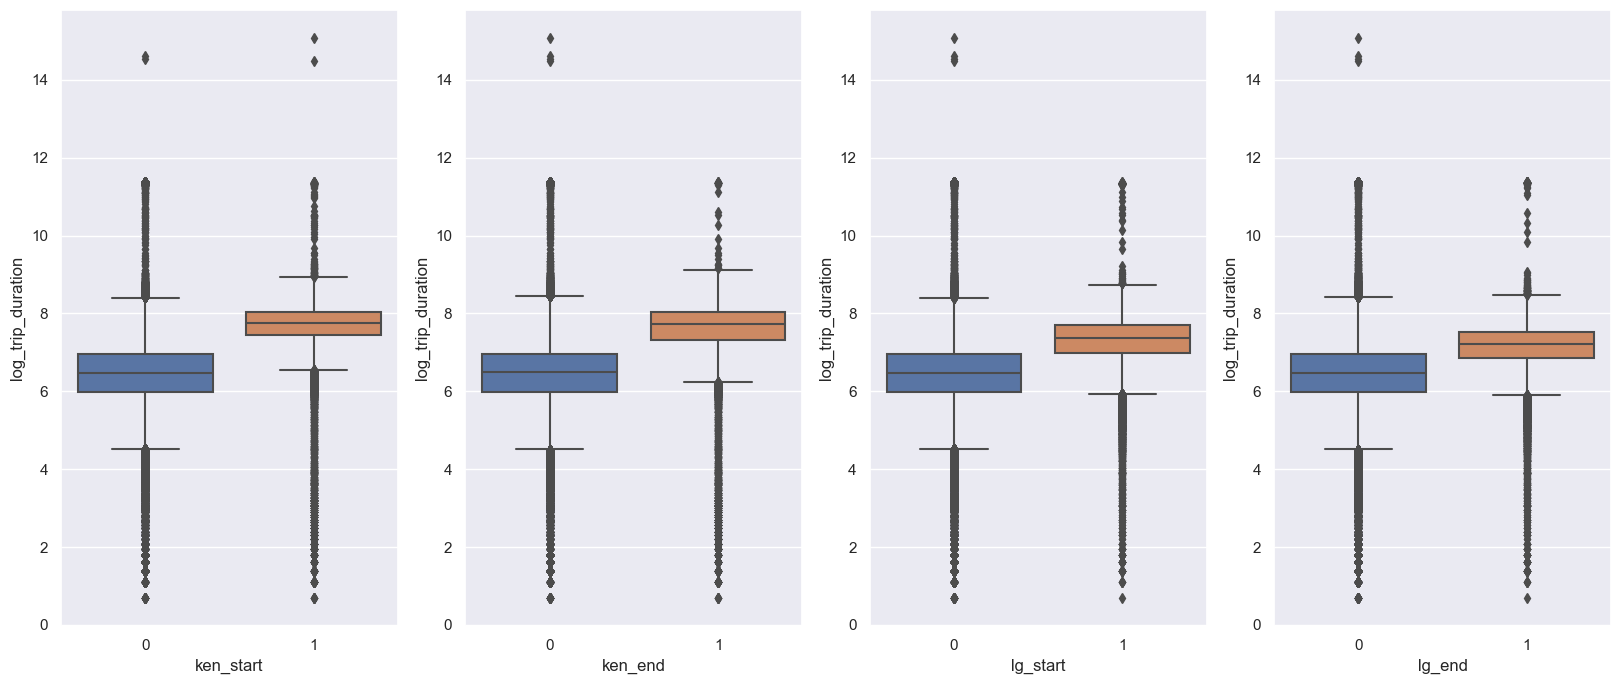

In [42]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
fig, ax = plt.subplots(1, 4,  figsize=(20, 8))
sns.boxplot(data=df_train, x='ken_start', y='log_trip_duration', ax=ax[0])
sns.boxplot(data=df_train, x='ken_end', y='log_trip_duration', ax=ax[1])

sns.boxplot(data=df_train, x='lg_start', y='log_trip_duration', ax=ax[2])
sns.boxplot(data=df_train, x='lg_end', y='log_trip_duration', ax=ax[3])

**Вопрос**: судя по графикам, как вы думаете, хорошими ли получились эти признаки?

----
ANS:

Да, зависимость немного видна, но при этом там очень много выбросов, так что наверное лучше не стоит особо уделять внимания этим признакам

----

<img src="https://www.dropbox.com/s/xson9nukz5hba7c/map.png?raw=1" align="right" width="20%" style="margin-left: 20px; margin-bottom: 20px">

**Задание 9 (1 балл)**. Сейчас мы почти что не используем сами значения координат. На это есть несколько причин: по отдельности рассматривать широту и долготу не имеет особого смысла, стоит рассматривать их вместе. Во-вторых, понятно, что зависимость между нашим таргетом и координатами не линейная. Чтобы как-то использовать координаты, можно прибегнуть к следующему трюку: обрамим область с наибольшим количеством поездок прямоугольником (как на рисунке). Разобьем этот прямоугольник на ячейки. Каждой точке сопоставим номер ее ячейки, а тем точкам, что не попали ни в одну из ячеек, сопоставим значение -1.

Напишите трансформер, который сначала разбивает показанную на рисунке область на ячейки, а затем создает два признака: номер ячейки, в которой началась поездка, и номер ячейки, в которой закончилась поездка. Количество строк и столбцов выберите самостоятельно.

Обратите внимание, что все вычисления должны быть векторизованными, трансформер не должен модифицировать передаваемую ему выборку inplace, а все необходимые статистики (если они вдруг нужны) нужно считать только по обучающей выборке в методе `fit`:

Любой прямоугольник можно точно определить по 2 кординатам (например нижния левая и верхняя правая)

Напишу функцию которая разбивая один большой прямоугольник на много маленьких

---
lat - это по гаризонтали

lon - это по вертикали

(вертикаль, горизонталь)

так до конца и непонял где высота ширина и в каком они порядке идут.....

In [43]:
def draw_rec(location, points):
    m = folium.Map(location=location)
    
    for point in points:
        folium.Rectangle([point[0], point[1]], fill_color="green", fill_opacity=0.5).add_to(m)
    return m

In [44]:
def cut_rec(bot_left, top_right, y_num, x_num):
    w = np.abs(top_right[0] - bot_left[0])
    h = np.abs(top_right[1] - bot_left[1])
    
    h_small = h / y_num
    w_small = w / x_num
    
    points = [] # [[bot_left], [top_right]] для каждой из точек
    
    for y_step in range(y_num):
        for x_step in range(x_num):
            # bot left for small rect
            x1 = bot_left[0] + x_step * w_small
            y1 = bot_left[1] + y_step * h_small
            
            # top right for small rect
            x2 = x1 + w_small
            y2 = y1 + h_small
            
            points.append([[x1, y1], [x2, y2]])
            
    return points
            
    

In [45]:
# это просто рандомный прямоугольник, не тот который надо
bl = [40.6004,-74.0657]
tr = [40.8128,-73.7952]

loc = [40.7296,-73.9490]

points = cut_rec(bl, tr, 5, 3)
m = draw_rec(loc, points)
m

In [46]:
import random

def random_hex_color():
    return "#{:02x}{:02x}{:02x}".format(random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))

grad_colors = [random_hex_color() for _ in range(40)]

In [47]:
from sklearn.base import BaseEstimator, TransformerMixin


# TransformerMixin implements fit_transform for you,
# applying your fit and transform consistently
    
class MapGridTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, points):
        self.points = points
    
    def show_map(self, data, lat_col, lon_col, column_name):
        location = [data[lat_col].mean(),data[lon_col].mean()]
        m = folium.Map(location=location)
        
        for point in self.points:
            folium.Rectangle([point[0], point[1]], fill_color="green", fill_opacity=0.5).add_to(m)
            
        for _, row in data.iterrows():
            folium.Circle(
                radius=100,
                location=(row[lat_col], row[lon_col]),
                color=grad_colors[row[column_name] + 2],
                fill_color=grad_colors[row[column_name] + 2],
                fill=True
            ).add_to(m)
        return m
    
    def is_point_in_rec(self, x, y, rec):
        return (x >= rec[0][0]) & (x <= rec[1][0]) & (y >= rec[0][1]) & (y <= rec[1][1])
    
    def fit(self, X=None, y=None):
        # your code here
        return self

    def transform(self, X, y=None):
        data = X.copy()
        
        data['start_rec'] = -1
        data['end_rec'] = -1
        
        i = 0
        for point in self.points:
            i += 1
            
            is_in_start = self.is_point_in_rec(data['pickup_latitude'], data['pickup_longitude'], point)
            is_in_end = self.is_point_in_rec(data['dropoff_latitude'], data['dropoff_longitude'], point)
            data.loc[is_in_start, 'start_rec'] = i
            data.loc[is_in_end, 'end_rec'] = i
            

        return data

In [48]:
bl = [40.6974,-74.0223]
tr = [40.8124,-73.9339]

loc = [40.7834,-73.9658]

points = cut_rec(bl, tr, 5, 5)
m = draw_rec(loc, points)
m

In [49]:
t = MapGridTransformer(points)

df_train = t.transform(df_train)
df_test = t.transform(df_test)

    
df_train.head()

id  vendor_id     pickup_datetime    dropoff_datetime  \
1011257  id2209155          2 2016-05-03 09:03:08 2016-05-03 09:17:12   
178550   id0586605          1 2016-01-01 16:40:51 2016-01-01 16:57:32   
551460   id0467144          1 2016-04-24 13:57:03 2016-04-24 14:14:31   
1434271  id0989010          2 2016-01-10 17:03:47 2016-01-10 17:16:51   
1173610  id0580742          1 2016-02-25 17:37:36 2016-02-25 17:49:48   

         passenger_count  pickup_longitude  pickup_latitude  \
1011257                2        -73.979813        40.752529   
178550                 1        -73.977623        40.746296   
551460                 1        -73.950699        40.779404   
1434271                1        -73.984558        40.721802   
1173610                1        -73.967720        40.768742   

         dropoff_longitude  dropoff_latitude  store_and_fwd_flag  ...  \
1011257         -73.982681         40.763680                   0  ...   
178550          -73.968414         40.788933                   0  ...   
551460          -73.863129         40.768608                   0  ...   
1434271         -73.976753         40.752213                   0  ...   
1173610         -73.977173         40.789875                   0  ...   

              hav   log_hav  traffic_on  traffic_off ken_start  ken_end  \
1011257  1.263187  0.816774           1            0         0        0   
178550   4.804012  1.758549           1            0         0        0   
551460   7.471088  2.136659           0            0         0        0   
1434271  3.444869  1.491750           0            0         0        0   
1173610  2.481063  1.247338           1            0         0        0   

         lg_start  lg_end  start_rec  end_rec  
1011257         0       0         13       13  
178550          0       0         13       19  
551460          0       1         24       -1  
1434271         0       0         12       13  
1173610         0       0         19       15  

[5 rows x 28 columns]

In [50]:
t.show_map(df_train.sample(3000), 'pickup_latitude', 'pickup_longitude', 'start_rec')

**Задание 10 (0.25 балла)**. Обучите `Ridge`-регрессию со стандартными параметрами на признаках, которые мы выделили к текущему моменту. Категориальные признаки закодируйте через one-hot-кодирование, числовые признаки отмасштабируйте.

квадраты начала и конца сделаем категориальными, тк у них порядка, те мы не можем сказать, что квадрат 10 лучше чем 7

да количествопризнаков вырастет, но у нас много объектов, так что ничего страшного

In [51]:
for el in df_train.columns:
    print(f"'{el}'")

'id'
'vendor_id'
'pickup_datetime'
'dropoff_datetime'
'passenger_count'
'pickup_longitude'
'pickup_latitude'
'dropoff_longitude'
'dropoff_latitude'
'store_and_fwd_flag'
'trip_duration'
'pickup_date'
'log_trip_duration'
'hour'
'month'
'day'
'day_year'
'outlier'
'hav'
'log_hav'
'traffic_on'
'traffic_off'
'ken_start'
'ken_end'
'lg_start'
'lg_end'
'start_rec'
'end_rec'


In [52]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

numerical_features = ['passenger_count', 
                      'pickup_longitude', 
                      'pickup_latitude',
                      'dropoff_longitude', 
                      'dropoff_latitude', 
                      'outlier', 
                      'log_hav', 
                      'traffic_on', 
                      'traffic_off']

categorical_features = ['hour', 
                        'month', 
                        'day', 
                        'day_year', 
                        'start_rec', 
                        'end_rec']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])


pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

pipeline.fit(df_train[numerical_features + categorical_features], df_train['log_trip_duration'])

pred = pipeline.predict(df_test[numerical_features + categorical_features])

print(f"RMSLE (test) = {rmsle(df_test['log_trip_duration'], pred)}")

RMSLE (test) = 0.4755274170279464


## Часть 3. Изучаем оставшиеся признаки (1 балл)

**Задание 11 (0.75 баллов)**. У нас осталось еще 3 признака, которые мы не исследовали: `vendor_id`, `passenger_count` и `store_and_fwd_flag`.

**Вопрос**: Подумайте, почему каждый из этих признаков может быть потенциально полезным.

-----

ANS:
по другим не знаю, но может долгие поездки совершаются в компании с кем-то


----



Посчитайте, сколько есть уникальных значений у каждого из этих признаков:

In [53]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df_train['vendor_id'].value_counts()

2    546566
1    474484
Name: vendor_id, dtype: int64

In [54]:
df_train['passenger_count'].value_counts()

1    723614
2    147429
5     54532
3     41919
6     33707
4     19804
0        41
7         2
8         1
9         1
Name: passenger_count, dtype: int64

In [55]:
df_train['store_and_fwd_flag'].value_counts()

0    1015403
1       5647
Name: store_and_fwd_flag, dtype: int64

Постройте "ящики с усами" распределений логарифма времени поездки в зависимости от значений каждого из признаков

<Axes: xlabel='store_and_fwd_flag', ylabel='log_trip_duration'>

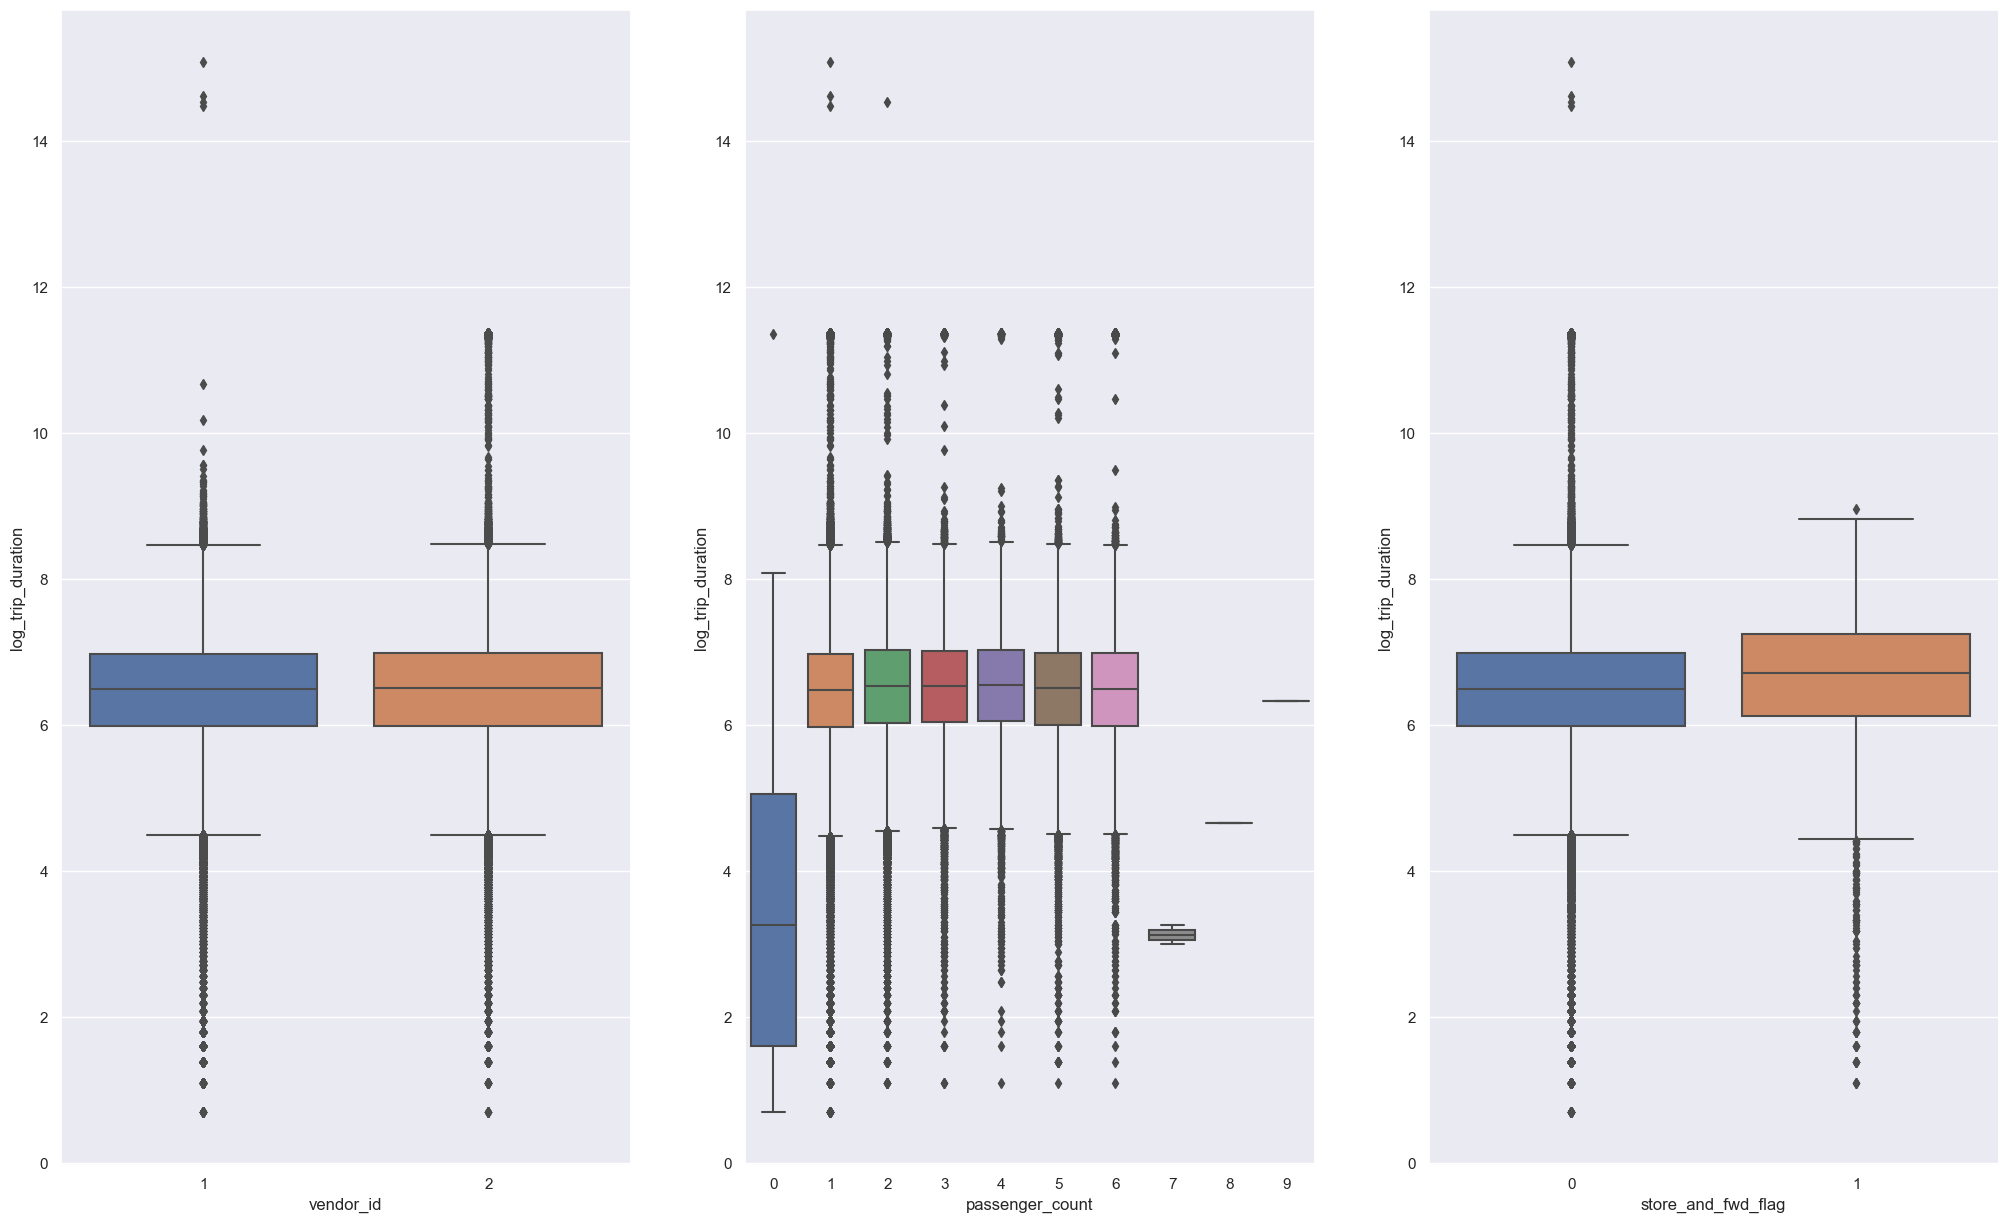

In [56]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

fig, ax = plt.subplots(1, 3,  figsize=(25, 15))
sns.boxplot(data=df_train, x='vendor_id', y='log_trip_duration', ax=ax[0])
sns.boxplot(data=df_train, x='passenger_count', y='log_trip_duration', ax=ax[1])
sns.boxplot(data=df_train, x='store_and_fwd_flag', y='log_trip_duration', ax=ax[2])

Переведите признаки `vendor_id` и `store_and_fwd_flag` в значения $\{0;1\}$

In [57]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
# store_flag модифицировал в самом начале
df_train['vendor_id'] = df_train['vendor_id'] - 1
df_test['vendor_id'] = df_test['vendor_id'] - 1

df_train['vendor_id'].value_counts()

1    546566
0    474484
Name: vendor_id, dtype: int64

**Вопрос**: Основываясь на графиках выше, как вы думаете, будут ли эти признаки сильными?

---
ANS:

да они  бесполезные, вообще не видно разницы между классами

---

**Задание 12 (0.25 баллов)**. Проверьте свои предположения, обучив модель в том числе и на этих трех признаках. Обучайте `Ridge`-регрессию со стандартными параметрами. Категориальные признаки закодируйте one-hot-кодированием, а численные отмасштабируйте.

In [58]:
for el in df_train.columns:
    print(f"'{el}'")

'id'
'vendor_id'
'pickup_datetime'
'dropoff_datetime'
'passenger_count'
'pickup_longitude'
'pickup_latitude'
'dropoff_longitude'
'dropoff_latitude'
'store_and_fwd_flag'
'trip_duration'
'pickup_date'
'log_trip_duration'
'hour'
'month'
'day'
'day_year'
'outlier'
'hav'
'log_hav'
'traffic_on'
'traffic_off'
'ken_start'
'ken_end'
'lg_start'
'lg_end'
'start_rec'
'end_rec'


In [59]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

numerical_features = ['passenger_count', 
                      'pickup_longitude', 
                      'pickup_latitude',
                      'dropoff_longitude', 
                      'dropoff_latitude', 
                      'outlier', 
                      'log_hav', 
                      'traffic_on', 
                      'traffic_off', 
                      'vendor_id', 
                      'store_and_fwd_flag']

categorical_features = ['hour', 
                        'month', 
                        'day', 
                        'day_year', 
                        'start_rec', 
                        'end_rec']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])


pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

pipeline.fit(df_train[numerical_features + categorical_features], df_train['log_trip_duration'])

pred = pipeline.predict(df_test[numerical_features + categorical_features])

err_1 = rmsle(df_test['log_trip_duration'], pred)
print(f"RMSLE (test) = {err_1}")


RMSLE (test) = 0.4754573731233513


Если признаки не дали какого-то ощутимого улучшения метрики, их можно выбросить из данных.

Ну вот и не буду их дальше использовать

## Часть 4. Улучшаем модель (3 балла)

**Задание 13 (1 балл)**. В наших данных есть нетипичные объекты (выбросы, или outliers): с аномально маленьким времени поездки, с очень большим пройденным расстоянием или очень большими остатками регрессии. В этом задании предлагается исключить такие объекты из обучающей выборки. Для этого нарисуйте гистограммы распределения упомянутых выше величин, выберите объекты, которые можно назвать выбросами, и очистите __обучающую выборку__ от них.

Отметим, что хотя эти объекты и выглядят как выбросы, в тестовой выборке тоже скорее всего будут объекты с такими же странными значениями целевой переменной и/или признаков. Поэтому, возможно, чистка обучающей выборки приведёт к ухудшению качества на тесте. Тем не менее, всё равно лучше удалять выбросы из обучения, чтобы модель получалась более разумной и интерпретируемой.

<Axes: xlabel='log_trip_duration', ylabel='Count'>

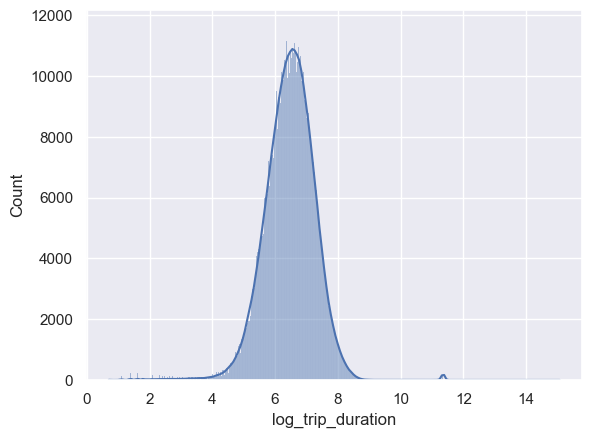

In [60]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
sns.histplot(data=df_train['log_trip_duration'], kde=True)

<Axes: xlabel='log_trip_duration', ylabel='Count'>

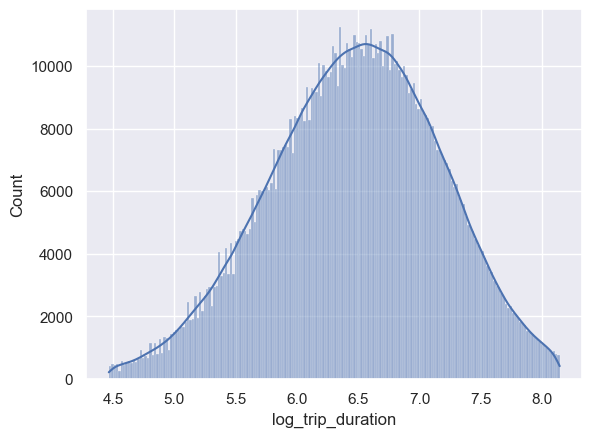

In [61]:
q_low = df_train['log_trip_duration'].quantile(0.01)
q_high = df_train['log_trip_duration'].quantile(0.99)

filtered_data = df_train[(df_train['log_trip_duration'] <= q_high) & (df_train['log_trip_duration'] >= q_low)]

sns.histplot(data=filtered_data['log_trip_duration'], kde=True)

<Axes: xlabel='log_hav', ylabel='Count'>

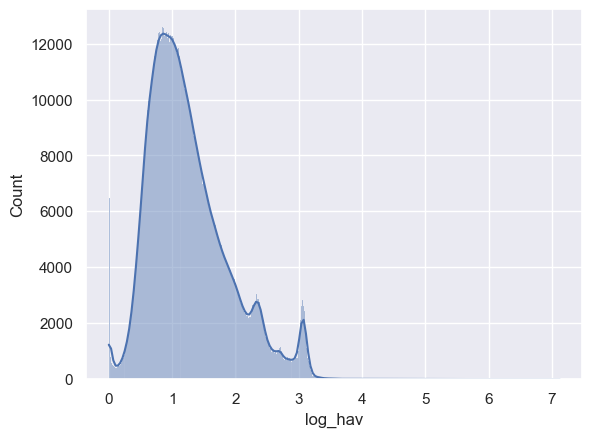

In [62]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
sns.histplot(data=df_train['log_hav'], kde=True)

<Axes: xlabel='log_hav', ylabel='Count'>

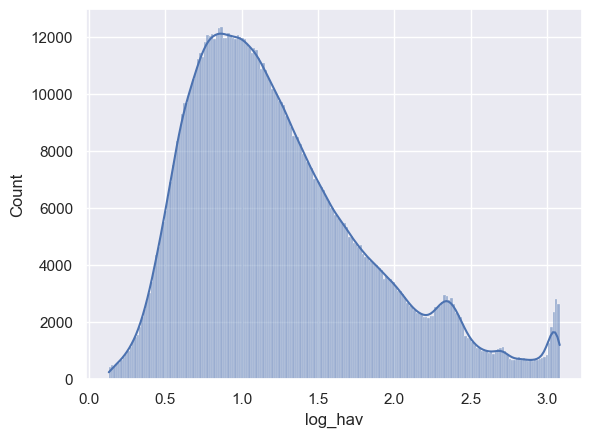

In [63]:
q_low = df_train['log_hav'].quantile(0.01)
q_high = df_train['log_hav'].quantile(0.99)

filtered_data = df_train[(df_train['log_hav'] <= q_high) & (df_train['log_hav'] >= q_low)]

sns.histplot(data=filtered_data['log_hav'], kde=True)

In [64]:
def filter_outliers(data):
    for col in ['log_trip_duration', 'log_hav']:
        q_low = data[col].quantile(0.01)
        q_high = data[col].quantile(0.99)

        data = data[(data[col] <= q_high) & (data[col] >= q_low)]
        
filter_outliers(df_train)

Сейчас у нас очень много категориальных признаков. В категориальных признаках могут содержаться редкие категории, обычно это плохо: модель сильно переобучается на таких примерах. Для каждого категориального признака объедините действительно редкие категории в одну, если такие имеются (т.е. если категории действительно редкие). 

In [65]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
# вот мои категориальные
categorical_features = ['hour', 
                        'month', 
                        'day', 
                        'day_year', 
                        'start_rec', 
                        'end_rec']

In [66]:
for c in categorical_features:
    print(c)
    display(df_train[c].value_counts())
    print('-------')

hour


18    63583
19    63319
21    58966
20    58899
22    56420
17    53658
14    52025
12    50592
15    50077
13    49980
23    48586
11    47805
9     47287
8     47039
10    45653
16    44808
7     38846
0     37573
1     26919
6     23341
2     19690
3     14596
4     10922
5     10466
Name: hour, dtype: int64

-------
month


March       179634
April       176118
May         173619
February    166625
June        164070
January     160984
Name: month, dtype: int64

-------
day


4    156641
5    154499
3    152966
2    146849
1    142239
6    136756
0    131100
Name: day, dtype: int64

-------
day_year


100    6844
107    6768
65     6627
106    6558
99     6513
       ... 
3      4465
25     4296
151    3916
24     2378
23     1154
Name: day_year, Length: 182, dtype: int64

-------
start_rec


 13    204488
 7     140049
 8     129809
 19     96157
-1      76348
 14     74033
 12     59984
 18     55400
 1      41353
 2      30342
 24     25146
 6      20422
 20     20149
 15     13008
 9      10098
 25      7199
 3       6724
 16      3246
 23      2386
 11      1928
 21      1338
 17       866
 22       557
 4         16
 10         3
 5          1
Name: start_rec, dtype: int64

-------
end_rec


 13    196352
 7     114357
 8     113533
-1     113016
 19     94465
 14     67920
 12     58552
 18     50056
 1      41710
 2      27912
 24     27505
 20     24372
 6      19350
 25     14529
 15     13993
 9      12194
 3       7650
 16      6736
 11      4908
 21      3824
 23      3572
 17      2759
 22      1723
 4         40
 10        18
 5          4
Name: end_rec, dtype: int64

-------


Они все примерно сбалансированные, кроме некоторых прямоугольников, вот их и объедею

In [67]:
def combine_cats(data):
    mask = (data['start_rec'].isin([4, 5, 10]))
    data.loc[mask, 'start_rec'] = 4
    
    mask = (data['end_rec'].isin([4, 5, 10]))
    data.loc[mask, 'end_rec'] = 4
    
for data in [df_train, df_test]:
    combine_cats(data)

Обучите модель на очищенных данных и посчитайте качество на тестовой выборке.

In [68]:
numerical_features = ['passenger_count', 
                      'pickup_longitude', 
                      'pickup_latitude',
                      'dropoff_longitude', 
                      'dropoff_latitude', 
                      'outlier', 
                      'log_hav', 
                      'traffic_on', 
                      'traffic_off', 
                      'vendor_id', 
                      'store_and_fwd_flag']

categorical_features = ['hour', 
                        'month', 
                        'day', 
                        'day_year', 
                        'start_rec', 
                        'end_rec']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])


pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

pipeline.fit(df_train[numerical_features + categorical_features], df_train['log_trip_duration'])

pred = pipeline.predict(df_test[numerical_features + categorical_features])

err_2 = rmsle(df_test['log_trip_duration'], pred)
print(f"RMSLE (test) = {err_2}")

RMSLE (test) = 0.4754588434567448


In [69]:
err_1 - err_2

-1.4703333934829033e-06

хахах, качество даже просело 

**Задание 14 (1 балл)**. После OneHot-кодирования количество признаков в нашем датасете сильно возрастает. Посчитайте колиество признаков до и после кодирования категориальных признаков.

In [70]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
df_train.shape

(1021050, 28)

In [71]:
preprocessor.transform(df_train).shape

(1021050, 278)

Попробуйте обучить не `Ridge`-, а `Lasso`-регрессию. Какой метод лучше?

In [72]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.linear_model import Lasso

numerical_features = ['passenger_count', 
                      'pickup_longitude', 
                      'pickup_latitude',
                      'dropoff_longitude', 
                      'dropoff_latitude', 
                      'outlier', 
                      'log_hav', 
                      'traffic_on', 
                      'traffic_off', 
                      'vendor_id', 
                      'store_and_fwd_flag']

categorical_features = ['hour', 
                        'month', 
                        'day', 
                        'day_year', 
                        'start_rec', 
                        'end_rec']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])


pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Lasso())
])

pipeline.fit(df_train[numerical_features + categorical_features], df_train['log_trip_duration'])

pred = pipeline.predict(df_test[numerical_features + categorical_features])

err_3 = rmsle(df_test['log_trip_duration'], pred)
print(f"RMSLE (test) = {err_3}")

RMSLE (test) = 0.795026955552643


In [73]:
err_2 - err_3

-0.31956811209589825

качество просело

Разбейте _обучающую выборку_ на обучающую и валидационную в отношении 8:2. По валидационной выборке подберите оптимальные значения параметра регуляризации (по логарифмической сетке) для `Ridge` и `Lasso`, на тестовой выборке измерьте качество лучшей полученной модели.

In [74]:
numerical_features = ['passenger_count', 
                      'pickup_longitude', 
                      'pickup_latitude',
                      'dropoff_longitude', 
                      'dropoff_latitude', 
                      'outlier', 
                      'log_hav', 
                      'traffic_on', 
                      'traffic_off', 
                      'vendor_id', 
                      'store_and_fwd_flag']

categorical_features = ['hour', 
                        'month', 
                        'day', 
                        'day_year', 
                        'start_rec', 
                        'end_rec']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

In [75]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline


param_grid_lasso = {
    'alpha': np.logspace(-3, 3, 5)
}

grid_lasso = GridSearchCV(estimator=Lasso(), param_grid=param_grid_lasso, 
                          cv=5, scoring='neg_root_mean_squared_error', 
                          verbose=3, n_jobs = 1)

lasso_pipeline = Pipeline(steps=[('preproc', preprocessor), ('cv', grid_lasso)])
lasso_model = lasso_pipeline.fit(df_train[numerical_features + categorical_features], df_train['log_trip_duration'])

lasso_pred = lasso_model.predict(df_test[numerical_features + categorical_features])

err_lasso = rmsle(df_test['log_trip_duration'], lasso_pred)
print("Lasso Best Params:", grid_lasso.best_params_)
print(f"RMSLE using Lasso (test) = {err_lasso}")


Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ......................alpha=0.001;, score=-0.476 total time=  11.2s
[CV 2/5] END ......................alpha=0.001;, score=-0.481 total time=  11.9s
[CV 3/5] END ......................alpha=0.001;, score=-0.483 total time=  10.7s
[CV 4/5] END ......................alpha=0.001;, score=-0.498 total time=   7.0s
[CV 5/5] END ......................alpha=0.001;, score=-0.479 total time=  11.6s
[CV 1/5] END ........alpha=0.03162277660168379;, score=-0.505 total time=   1.9s
[CV 2/5] END ........alpha=0.03162277660168379;, score=-0.508 total time=   1.9s
[CV 3/5] END ........alpha=0.03162277660168379;, score=-0.510 total time=   1.9s
[CV 4/5] END ........alpha=0.03162277660168379;, score=-0.509 total time=   2.1s
[CV 5/5] END ........alpha=0.03162277660168379;, score=-0.508 total time=   1.9s
[CV 1/5] END ........................alpha=1.0;, score=-0.792 total time=   0.6s
[CV 2/5] END ........................alpha=1.0;, 

Text(0, 0.5, 'CV lasso error')

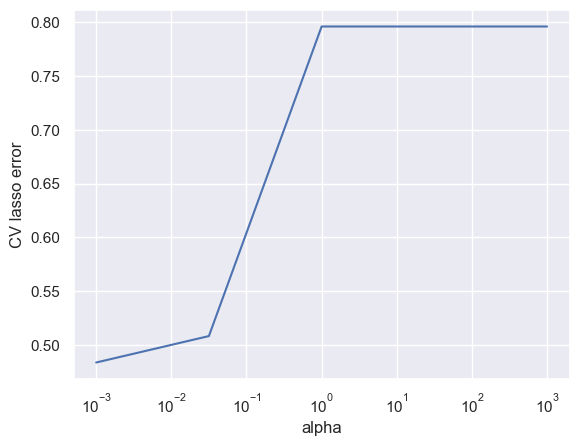

In [76]:
plt.plot(np.logspace(-3, 3, 5), -grid_lasso.cv_results_['mean_test_score'])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV lasso error")

In [77]:
param_grid_ridge = {
    'alpha': np.logspace(-3, 5, 5)
}

grid_ridge = GridSearchCV(estimator=Ridge(), param_grid=param_grid_ridge, 
                          cv=5, scoring='neg_root_mean_squared_error', 
                          verbose=3, n_jobs = 1)

ridge_pipeline = Pipeline(steps=[('preproc', preprocessor), ('cv', grid_ridge)])
ridge_model = ridge_pipeline.fit(df_train[numerical_features + categorical_features], df_train['log_trip_duration'])

ridge_pred = ridge_model.predict(df_test[numerical_features + categorical_features])

err_ridge = rmsle(df_test['log_trip_duration'], ridge_pred)
print("Ridge Best Params:", grid_ridge.best_params_)
print(f"RMSLE using ridge (test) = {err_ridge}")

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ......................alpha=0.001;, score=-0.472 total time=   3.0s
[CV 2/5] END ......................alpha=0.001;, score=-0.476 total time=   3.0s
[CV 3/5] END ......................alpha=0.001;, score=-0.480 total time=   3.0s
[CV 4/5] END ......................alpha=0.001;, score=-0.489 total time=   3.0s
[CV 5/5] END ......................alpha=0.001;, score=-0.475 total time=   3.1s
[CV 1/5] END ........................alpha=0.1;, score=-0.472 total time=   3.2s
[CV 2/5] END ........................alpha=0.1;, score=-0.476 total time=   3.3s
[CV 3/5] END ........................alpha=0.1;, score=-0.480 total time=   3.2s
[CV 4/5] END ........................alpha=0.1;, score=-0.489 total time=   3.1s
[CV 5/5] END ........................alpha=0.1;, score=-0.475 total time=   3.4s
[CV 1/5] END .......................alpha=10.0;, score=-0.472 total time=   3.1s
[CV 2/5] END .......................alpha=10.0;, 

Text(0, 0.5, 'CV ridge error')

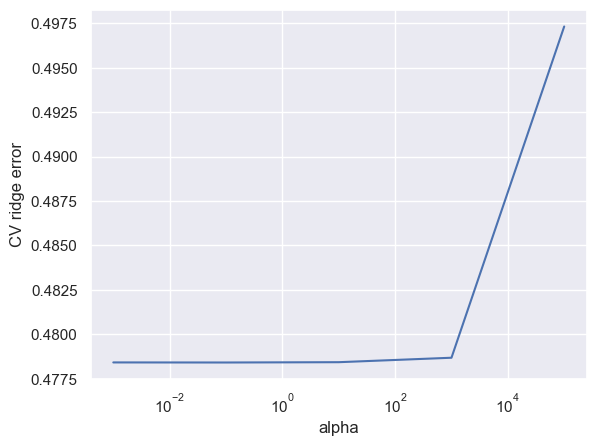

In [78]:
plt.plot(np.logspace(-3, 5, 5), -grid_ridge.cv_results_['mean_test_score'])
plt.xscale("log")
plt.xlabel("alpha")
plt.ylabel("CV ridge error")

Для каждого перебранного `alpha` для Lasso посчитайте количество нулевых весов в модели и нарисуйте график зависимости его от `alpha`. Как сильно придётся потерять в качестве, если мы хотим с помощью Lasso избавиться хотя бы от половины признаков?


------
ANS:

Там если брать меньшие альфы то очень долго начинается обучатся, как раз из-за того что веса слабо зануляются и градинтный спуск медленно сходится 

Поэтому лучше построю красивый график, из него видно , что если захотим занулять веса, качество быстро упадет

-----

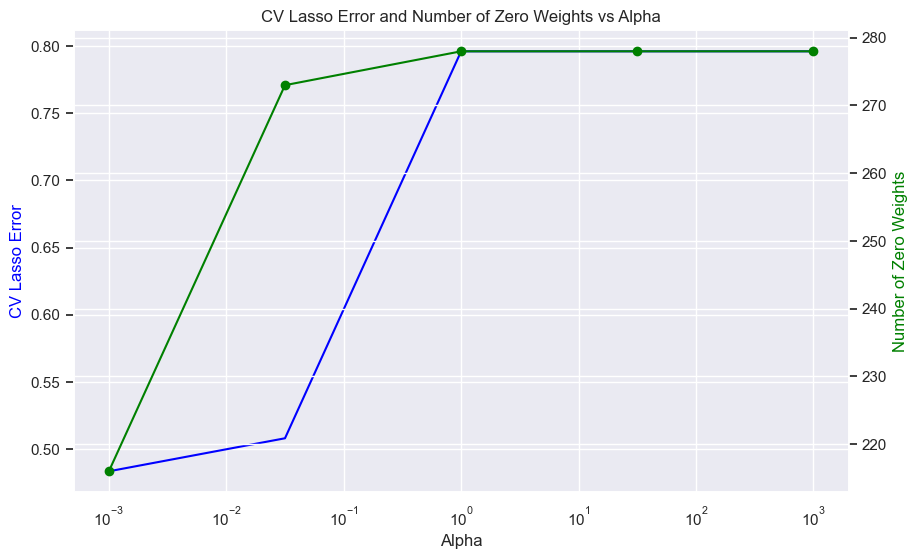

In [79]:
alphas = param_grid_lasso['alpha']
num_zero_weights = []

for alpha in alphas:
    lasso_for_alpha = grid_lasso.estimator.set_params(alpha=alpha)
    lasso_for_alpha.fit(preprocessor.transform(df_train[numerical_features + categorical_features]), df_train['log_trip_duration'])
    
    zero_weights = np.sum(lasso_for_alpha.coef_ == 0)
    num_zero_weights.append(zero_weights)

plt.figure(figsize=(10, 6))

plt.plot(alphas, -grid_lasso.cv_results_['mean_test_score'], label='CV Lasso Error', color='blue')
plt.xlabel('Alpha')
plt.ylabel('CV Lasso Error', color='blue')
plt.title('CV Lasso Error and Number of Zero Weights vs Alpha')

ax2 = plt.gca().twinx()
ax2.plot(alphas, num_zero_weights, marker='o', label='Number of Zero Weights', color='green')
ax2.set_ylabel('Number of Zero Weights', color='green')

plt.xscale('log')
plt.grid(True)
plt.show()

<img src="https://www.dropbox.com/s/wp4jj0599np17lh/map_direction.png?raw=1" width="20%" align="right" style="margin-left: 20px">

**Задание 15 (1 балл)**. Часто бывает полезным использовать взаимодействия признаков (feature interactions), то есть строить новые признаки на основе уже существующих. Выше мы разбили карту Манхэттена на ячейки и придумали признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка".

Давайте попробуем сделать следующее: посчитаем, сколько раз встречается каждая возможная пара этих признаков в нашем датасете и выберем 100 самых частых пар. Закодируем поездки с этими частыми парами как категориальный признак, остальным объектам припишем -1. Получается, что мы закодировали, откуда и куда должно было ехать такси.

Также можете придумать ещё какой-нибудь способ сделать признаки про маршрут. Если эти признаки будут давать хороший прирост в качестве, то за это могут быть даны дополнительные бонусные баллы.

**Вопрос**: Почему такой признак потенциально полезный? Почему линейная модель не может самостоятельно "вытащить" эту информацию, ведь у нее в распоряжении есть признаки "из какой ячейки началась поездка" и "в какой ячейке закончилась поездка"?


------
ANS:

модель не знает про зависимость этих двух признаков, а мы ей об этом мообщаем, те даем дополнителоьные знания о данных

-----

In [80]:
df_train.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_date', 'log_trip_duration', 'hour', 'month',
       'day', 'day_year', 'outlier', 'hav', 'log_hav', 'traffic_on',
       'traffic_off', 'ken_start', 'ken_end', 'lg_start', 'lg_end',
       'start_rec', 'end_rec'],
      dtype='object')

In [81]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
in_rec = (df_train['start_rec'] != -1) & (df_train['end_rec'] != -1)

In [82]:
pairs = df_train[in_rec].groupby(['start_rec', 'end_rec']).\
agg('size').reset_index().\
rename(columns={0:'size'}).\
sort_values(by='size', ascending=False).head(100).iloc[:, [0, 1]]

pairs

start_rec  end_rec
214         13       13
123          8       13
95           7        7
210         13        8
352         19       19
..         ...      ...
248         14       24
115          8        3
117          8        6
92           7        3
348         19       15

[100 rows x 2 columns]

In [83]:
def apply_pairs(data, pairs):
    data['pair_idx'] = -1
    
    idx = 0
    for p in pairs.values:
        idx += 1
        mask = (data['start_rec'] == p[0]) & (data['end_rec'] == p[1])
        data.loc[mask, 'pair_idx'] = idx
        
for data in [df_train, df_test]:
    apply_pairs(data, pairs)

Заново обучите модель (`Ridge`, если она дала более высокое качество в предыдущих экспериментах, и `Lasso` иначе) на новых даннных и посчитайте качество на тестовой выборке

In [84]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
numerical_features = ['passenger_count', 
                      'pickup_longitude', 
                      'pickup_latitude',
                      'dropoff_longitude', 
                      'dropoff_latitude', 
                      'outlier', 
                      'log_hav', 
                      'traffic_on', 
                      'traffic_off', 
                      'vendor_id', 
                      'store_and_fwd_flag']

categorical_features = ['hour', 
                        'month', 
                        'day', 
                        'day_year', 
                        'start_rec', 
                        'end_rec',
                        'pair_idx']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])


pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge(0.1))
])

pipeline.fit(df_train[numerical_features + categorical_features], df_train['log_trip_duration'])

pred = pipeline.predict(df_test[numerical_features + categorical_features])

err_4 = rmsle(df_test['log_trip_duration'], pred)
print(f"RMSLE (test) = {err_4}")

RMSLE (test) = 0.4643513075561968


**Задание 16 (бонус, 1 балл)**. Где, как не для нашей задачи, считать манхэттенское расстояние?

**Вопрос**: Найдите, что такое манхэттенское расстояние и почему оно так называется. Как оно нам может помочь?

Введите систему координат на нашей карте так, чтобы оси были параллельны улицам Манхэттена, и добавьте сначала в данные признак "манхэттенское расстояние между пунктом отправления и пунктом назначения", а затем и логарифм этого признака. Посчитайте корреляцию между вашим новыми признаком и таргетом; между `log_haversine` и таргетом. В каком случае корреляция больше?

Нарисуйте карту, где покажете выбранные оси. Чтобы мы могли проверить вашу работу, просьба сделать скрин этой карты и приложить картинку (если мы откроем ваш ноутбук, виджеты отображаться не будут). 

План такой:
руками найду две направляющие, которые будут паралельны, а потом просто найду расстояние от каждой точки до них, так я получу новые координаты в нужной нам системе координат, а потом из них уже посчиатю расcтояние

In [87]:
import folium
from folium.vector_layers import PolyLine

central_lat, central_lon = 40.7164,-74.0313

m = folium.Map(location=[central_lat, central_lon], zoom_start=13)

def get_rotated_endpoints(lat, lon, angle_degrees, length=0.15):

    
    angle_rad = np.radians(angle_degrees)
    
    delta_x = length * np.cos(angle_rad)
    delta_y = length * np.sin(angle_rad)
    
    lat_new = lat + delta_y
    lon_new = lon + delta_x
    
    return lat_new, lon_new

end_lat_x, end_lon_x = get_rotated_endpoints(central_lat, central_lon, -23)
end_lat_y, end_lon_y = get_rotated_endpoints(central_lat, central_lon, 54)

y_line = [(central_lat, central_lon), (end_lat_x, end_lon_x)]
x_line = [(central_lat, central_lon), (end_lat_y, end_lon_y)]

PolyLine(y_line, color="red").add_to(m)


PolyLine(x_line, color="blue").add_to(m)

m


Не знаю прикрепится ли скрин, я его просто так в anytask прикреплю

![ima]('/Users/maximzabelin/Desktop/edcucat/ml_hw2/map.png')

<img src="/Users/maximzabelin/Desktop/edcucat/ml_hw2/map.png" alt="My Image" width="500"/>


In [88]:
def calc_new_origin(data, lat_col, lon_col, line1, line2, name_x, name_y):
    x1 = line1[0][0]
    y1 = line1[0][1]
    x2 = line1[1][0]
    y2 = line1[1][1]

    a = y2 - y1
    b = x1 - x2
    c = x2*y1 - x1*y2

    data[name_x] = np.abs(a*data[lat_col] + b*data[lon_col] + c) / np.sqrt(a**2 + b**2)

    x1 = line2[0][0]
    y1 = line2[0][1]
    x2 = line2[1][0]
    y2 = line2[1][1]

    a = y2 - y1
    b = x1 - x2
    c = x2*y1 - x1*y2

    data[name_y] = np.abs(a*data[lat_col] + b*data[lon_col] + c) / np.sqrt(a**2 + b**2)

def calc_manh(data, lat1, lon1, lat2, lon2, name):
     data[name] = 500*(np.abs(data[lat1] - data[lat2]) + np.abs(data[lon1] - data[lon2]))

        
central_lat, central_lon = 40.7164,-74.0313
end_lat_x, end_lon_x = get_rotated_endpoints(central_lat, central_lon, -23)
end_lat_y, end_lon_y = get_rotated_endpoints(central_lat, central_lon, 54)

y_line = [(central_lat, central_lon), (end_lat_x, end_lon_x)]
x_line = [(central_lat, central_lon), (end_lat_y, end_lon_y)]        
        
for data in [df_train, df_test]:
    calc_new_origin(data, 'pickup_latitude', 'pickup_longitude', y_line, x_line, 'x_manh_pickup', 'y_manh_pickup')
    calc_new_origin(data, 'dropoff_latitude', 'dropoff_longitude', y_line, x_line, 'x_manh_dropoff', 'y_manh_dropoff')
    
    calc_manh(data, 'x_manh_pickup', 'y_manh_pickup', 'x_manh_dropoff', 'y_manh_dropoff', 'mdist')
    data['log_mdist'] = np.log1p(data['mdist'])
    


<Axes: >

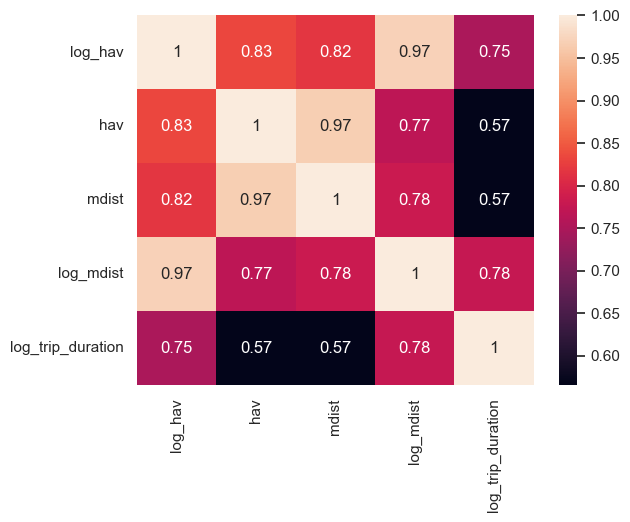

In [89]:
sns.heatmap(df_train[['log_hav', 'hav', 'mdist', 'log_mdist', 'log_trip_duration']].corr(), annot=True)

Заново обучите модель на новых даннных и посчитайте качество на тестовой выборке. Стало ли лучше? Объясните полученный результат.

In [90]:
df_train.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_date', 'log_trip_duration', 'hour', 'month',
       'day', 'day_year', 'outlier', 'hav', 'log_hav', 'traffic_on',
       'traffic_off', 'ken_start', 'ken_end', 'lg_start', 'lg_end',
       'start_rec', 'end_rec', 'pair_idx', 'x_manh_pickup', 'y_manh_pickup',
       'x_manh_dropoff', 'y_manh_dropoff', 'mdist', 'log_mdist'],
      dtype='object')

In [91]:
numerical_features = ['passenger_count', 
                      'pickup_longitude', 
                      'pickup_latitude',
                      'dropoff_longitude', 
                      'dropoff_latitude', 
                      'outlier', 
                      'log_hav', 
                      'log_mdist',
                      'traffic_on', 
                      'traffic_off', 
                      'vendor_id', 
                      'store_and_fwd_flag']

categorical_features = ['hour', 
                        'month', 
                        'day', 
                        'day_year', 
                        'start_rec', 
                        'end_rec',
                        'pair_idx']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])


pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge(0.1))
])

pipeline.fit(df_train[numerical_features + categorical_features], df_train['log_trip_duration'])

pred = pipeline.predict(df_test[numerical_features + categorical_features])

err_5 = rmsle(df_test['log_trip_duration'], pred)
print(f"RMSLE (test) = {err_5}")

RMSLE (test) = 0.44621199106023374


In [92]:
err_4 - err_5

0.018139316495963065

ну да , немного улучшили

**Задание 17 (бонус, 2 балла)**. Реализуйте трансформер, который строит разбиение карты по шестигранной решётке с помощью библиотеки [H3](https://github.com/uber/h3-py) и вычисляет признаки на основе такого разбиения.

Признаки могут быть самые разные: расстояние между точкой старта и финиша, посчитанное в количестве шестиугольников; статистика по числу поездок и по их продолжительности в соседних шестиугольниках.

Важно: производительность библиотеки существенно зависит от количества шестиугольников на карте (определяется параметром resolution). Подберите такое разрешение, при котором ваш код будет работать за приемлемое время.

При построении признаков старайтесь не допустить утечки целевой переменной (подробнее про это можно почитать в материалах 1-го семинара) — в противном случае хорошего качества на тестовой выборке достичь не получится.

Измерьте качество после добавления новых признаков. За улучшение функционала ошибки на каждые 0.005 на тестовой выборке будет даваться 0.5 бонусных балла. Можно получить до 2 бонусных баллов за это задание.

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

Вставьте картинку, описывающую ваш опыт выполнения этого ДЗ.